<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">QBUS6810 Group Assigment</h1>
<h2 align="center" style="margin-top:20px">Group 70 </h2>
<br>

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore') 

In [301]:
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

In [303]:
pd.set_option('max_columns',100)
pd.set_option('max_row',300)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1. Read data

## 1.1 Data review

In [304]:
ori_train = pd.read_csv('train.csv')
ori_test = pd.read_csv("test.csv",index_col=0)
ori_train.head()

name  \
0     Brand New House with Private Bathroom Miranda   
1     Single bedroom apartment in heart of Randwick   
2   Couples stylish retreat 10 mins to Sydney  city   
3         Manly Retreat with Sweeping Harbour Views   
4  Cozy bedroom just 5 min walking to Dee Why beach   

                                             summary  \
0  New house built in (Phone number hidden by Air...   
1  Furnished, single bedroom apartment, Bedroom, ...   
2  Stylish Victorian terrace. 1 king size bed and...   
3  This stunning coastal retreat is a few metres ...   
4  Our place is a cozy and light apartment, just ...   

                                               space  \
0  Guests are welcomed to use all amenities avail...   
1                                                NaN   
2  Bedroom king size bed ,bathroom, lounge, dinin...   
3  2 Bedroom Scandinavian inspired beach apartmen...   
4  If it's necessary we can let a extra kids matt...   

                                         description experiences_offered  \
0  New house built in (Phone number hidden by Air...                none   
1  Furnished, single bedroom apartment, Bedroom, ...                none   
2  Stylish Victorian terrace. 1 king size bed and...                none   
3  This stunning coastal retreat is a few metres ...                none   
4  Our place is a cozy and light apartment, just ...                none   

                               neighborhood_overview  \
0  There’s a massive Westfield shopping centre ne...   
1  Randwick junction is at 5 minutes walk with al...   
2  7 mins walk to train station, 1 stop to thrivi...   
3  Fairlight is a calm harbourside neighbourhood ...   
4  Our building has just 8 suits, so it's pretty ...   

                                               notes  \
0  1, This is not the only room in the house bein...   
1                                                NaN   
2  If staying on Sunday night please put garbage ...   
3                                                NaN   
4                                                NaN   

                                             transit  \
0  Miranda train station is about 10-15 mins walk...   
1  Al the major bus stops to Sydney CBD, Bondi Be...   
2  Parramatta road 2 minutes buses to everywhere,...   
3  A flat water beach with ocean pool is located ...   
4  If you come by bus from Manly, you can get off...   

                                              access  \
0  Family area, living area, laundry area, backya...   
1                                                NaN   
2        The whole house except for 2 private rooms.   
3  Full apartment including balcony, washing mach...   
4  We also offer all kitchen aplliance, beach cha...   

                                         interaction  \
0  I don’t personally live in the house anymore a...   
1      Host 'll be available 24/7 on call and nearby   
2   Available for questions by email, phone or text.   
3  Hosts are contactable via text message but may...   
4                                                NaN   

                                         house_rules    host_id  host_since  \
0                                                NaN   50605711  2015-12-05   
1                                                NaN  120832230  2017-03-15   
2  When leaving please strip bed put all used lin...   35339631  2015-06-08   
3  - No shoes inside - Be considerate of neighbou...  115440332  2017-02-08   
4                    - Please, no shoes in the house   25713478  2015-01-06   

                         host_location  \
0  Miranda, New South Wales, Australia   
1                                   AU   
2   Sydney, New South Wales, Australia   
3   Sydney, New South Wales, Australia   
4   Sydney, New South Wales, Australia   

                                          host_about host_response_time  \
0  Just got back to Sydney in Jan 2019 after livi...     within an hour   
1                     

In [305]:
ori_train.shape

(10635, 83)

In [306]:
ori_test.shape

(24818, 82)

## 1.2 Data profiling

In [307]:
from pandas_profiling import ProfileReport
# # reference :https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/
# profile_train = ProfileReport(ori_train)
# profile_train

# 2. Data Procecssing

In [308]:
process_train = ori_train.copy()
process_test = ori_test.copy()

In [309]:
# cheking datatype
from dabl import detect_types
pro_train_types = detect_types(process_train)
pro_train_types.head(50)

continuous  dirty_float  low_card_int  categorical  \
name                            False        False         False        False   
summary                         False        False         False        False   
space                           False        False         False        False   
description                     False        False         False        False   
experiences_offered             False        False         False        False   
neighborhood_overview           False        False         False        False   
notes                           False        False         False        False   
transit                         False        False         False        False   
access                          False        False         False        False   
interaction                     False        False         False        False   
house_rules                     False        False         False        False   
host_id                          True        False         False        False   
host_since                      False        False         False        False   
host_location                   False        False         False        False   
host_about                      False        False         False        False   
host_response_time              False        False         False         True   
host_response_rate              False        False         False         True   
host_acceptance_rate            False        False         False         True   
host_is_superhost               False        False         False         True   
host_neighbourhood              False        False         False        False   
host_listings_count             False        False          True        False   
host_total_listings_count       False        False          True        False   
host_verifications              False        False         False        False   
host_identity_verified          False        False         False         True   
street                          False        False         False        False   
neighbourhood                   False        False         False        False   
neighbourhood_cleansed          False        False         False         True   
city                            False        False         False        False   
zipcode                         False         True         False        False   
smart_location                  False        False         False        False   
latitude                         True        False         False        False   
longitude                        True        False         False        False   
is_location_exact               False        False         False         True   
property_type                   False        False         False         True   
room_type                       False        False         False         True   
accommodates                    False        False          True        False   
bathrooms                        True        False         False        False   
bedrooms                         True        False         False        False   
beds                             True        False         False        False   
bed_type                        False        False         False        False   
amenities                       False        False         False        False   
square_feet                      True        False         False        False   
weekly_discount                  True        False         False        False   
monthly_discount                 True        False         False        False   
security_deposit_perc            True        False         False        False   
cleaning_fee_perc                True        False         False        False   
guests_included                 False        False          True        False   
extra_people_perc                True        False         False        False   
minimum_nights                  False        False        

Dirty float data

Since the variable ‘zipcode’ was deleted in the subsequent processing, this part of the processing is not mentioned in the report.

In [310]:
pro_train_types[pro_train_types['dirty_float']==True]

continuous  dirty_float  low_card_int  categorical   date  \
zipcode       False         True         False        False  False   

         free_string  useless  
zipcode        False    False

In [311]:
process_train['zipcode'].value_counts()

2026.0    466
2026      379
2010.0    286
2026.0    265
2000.0    254
         ... 
2557.0      1
2193.0      1
2192.0      1
2063        1
2146.0      1
Name: zipcode, Length: 565, dtype: int64

In [312]:
process_train['zipcode'].isnull().sum()

36

In [313]:
process_train['zipcode'].apply(np.isreal)

0        False
1        False
2        False
3        False
4        False
         ...  
10630     True
10631     True
10632     True
10633     True
10634     True
Name: zipcode, Length: 10635, dtype: bool

In [314]:
process_test.shape

(24818, 82)

In [315]:
process_train['zipcode']= pd.to_numeric(process_train['zipcode'], errors='coerce').dropna()
process_test['zipcode']= pd.to_numeric(process_train['zipcode'], errors='coerce').dropna()

In [316]:
process_test.shape

(24818, 82)

## 2.1 Treating “useless” variables

In [317]:
pro_train_types[pro_train_types['useless']==True]

continuous  dirty_float  \
experiences_offered                               False        False   
bed_type                                          False        False   
requires_license                                  False        False   
is_business_travel_ready                          False        False   
require_guest_profile_picture                     False        False   
require_guest_phone_verification                  False        False   
calculated_host_listings_count_shared_rooms       False        False   

                                             low_card_int  categorical   date  \
experiences_offered                                 False        False  False   
bed_type                                            False        False  False   
requires_license                                    False        False  False   
is_business_travel_ready                            False        False  False   
require_guest_profile_picture                       False        False  False   
require_guest_phone_verification                    False        False  False   
calculated_host_listings_count_shared_rooms         False        False  False   

                                             free_string  useless  
experiences_offered                                False     True  
bed_type                                           False     True  
requires_license                                   False     True  
is_business_travel_ready                           False     True  
require_guest_profile_picture                      False     True  
require_guest_phone_verification                   False     True  
calculated_host_listings_count_shared_rooms        False     True

In [318]:
#all none
process_train['experiences_offered'].value_counts()

none    10635
Name: experiences_offered, dtype: int64

In [319]:
#almost all real bed
process_train['bed_type'].value_counts()

Real Bed         10595
Pull-out Sofa       28
Futon               10
Couch                2
Name: bed_type, dtype: int64

In [320]:
#all false
process_train['requires_license'].value_counts()

f    10635
Name: requires_license, dtype: int64

In [321]:
#all false
process_train['is_business_travel_ready'].value_counts()

f    10635
Name: is_business_travel_ready, dtype: int64

In [322]:
process_train['require_guest_profile_picture'].value_counts()

f    10583
t       52
Name: require_guest_profile_picture, dtype: int64

In [323]:
process_train['require_guest_phone_verification'].value_counts()

f    10569
t       66
Name: require_guest_phone_verification, dtype: int64

In [324]:
process_train['calculated_host_listings_count_shared_rooms'].value_counts()

0     10513
1        85
2        18
4         9
31        4
3         2
17        2
6         1
5         1
Name: calculated_host_listings_count_shared_rooms, dtype: int64

In [325]:
#drop useless variables
useless_predictor = pro_train_types[pro_train_types['useless']==True].index
useless_predictor

Index(['experiences_offered', 'bed_type', 'requires_license',
       'is_business_travel_ready', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [326]:
process_train= process_train.drop(useless_predictor, axis = 1)
process_test = process_test.drop(useless_predictor, axis = 1)

## 2.2 Data Type Transformation

### 2.2.1 "price"

In [327]:
process_train['price'].value_counts()

$100.00      534
$199.00      445
$150.00      427
$121.00      334
$60.00       322
            ... 
$805.00        1
$997.00        1
$612.00        1
$630.00        1
$1,075.00      1
Name: price, Length: 436, dtype: int64

In [328]:
process_train['price']=process_train['price'].apply(lambda x : float(x.split('$')[1].replace(',','')))

### 2.2.2 “host_response_rate” and “host_acceptance_rate” 

In [329]:
process_train[['host_response_rate','host_acceptance_rate']].head(10)

host_response_rate host_acceptance_rate
0               100%                 100%
1                NaN                  NaN
2               100%                 100%
3                NaN                  NaN
4                NaN                  NaN
5               100%                 100%
6                NaN                 100%
7               100%                  98%
8               100%                 100%
9               100%                  NaN

In [330]:
# host_acceptance_rate
process_train['host_acceptance_rate']=process_train['host_acceptance_rate'].apply(lambda x : float(x.split('%')[0])*0.01 if pd.notnull(x) else 0 )
process_test['host_acceptance_rate']=process_test['host_acceptance_rate'].apply(lambda x : float(x.split('%')[0])*0.01 if pd.notnull(x) else 0 )

# host_response_rate
process_train['host_response_rate']=process_train['host_response_rate'].apply(lambda x : float(x.split('%')[0])*0.01 if pd.notnull(x) else 0 )
process_test['host_response_rate']=process_test['host_response_rate'].apply(lambda x : float(x.split('%')[0])*0.01 if pd.notnull(x) else 0 )

## 2.3 High correlated variable

In [331]:
process_train['host_location'].value_counts()

Sydney, New South Wales, Australia          3816
AU                                          1404
New South Wales, Australia                  1186
Bondi Beach, New South Wales, Australia      258
Australia                                    227
                                            ... 
Bordeaux, Aquitaine, France                    1
Moorebank, New South Wales, Australia          1
Sylhet Division, Bangladesh                    1
Odder, Central Denmark Region, Denmark         1
Mount Druitt, New South Wales, Australia       1
Name: host_location, Length: 795, dtype: int64

In [332]:
process_train.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_id',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'zipcode', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'square_feet', 'weekly_discount', 'monthly_discount',
       'security_deposit_perc', 'cleaning_fee_perc', 'guests_included',
       'extra_people_perc', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_n

In [333]:
# check the correlation with price
a = ['host_location','host_total_listings_count','minimum_minimum_nights',
                                    'maximum_minimum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                                    'maximum_nights_avg_ntm','availability_60','availability_90',
                                    'calculated_host_listings_count','calculated_host_listings_count_entire_homes']
process_train.corr()['price'].sort_values().loc[a[9]]

0.14567606986857898

In [334]:
# select the correlated variables
correlated_variables = ['host_listings_count', 'host_total_listings_count', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms']

In [335]:
process_train.corr()['price'].sort_values().loc[correlated_variables].round(3)

host_listings_count                             0.198
host_total_listings_count                       0.198
minimum_nights                                  0.011
maximum_nights                                  0.012
minimum_minimum_nights                          0.012
maximum_minimum_nights                          0.016
minimum_maximum_nights                          0.007
maximum_maximum_nights                          0.007
minimum_nights_avg_ntm                          0.012
maximum_nights_avg_ntm                          0.007
availability_30                                 0.091
availability_60                                 0.081
availability_90                                 0.078
availability_365                                0.105
calculated_host_listings_count                  0.146
calculated_host_listings_count_entire_homes     0.157
calculated_host_listings_count_private_rooms   -0.117
Name: price, dtype: float64

In [336]:
process_train[["minimum_nights_avg_ntm",'maximum_nights_avg_ntm']].head().round(3)

minimum_nights_avg_ntm  maximum_nights_avg_ntm
0                   1.000                1125.000
1                   3.000                  26.000
2                   1.000                1125.000
3                   5.000                1125.000
4                   2.000                  10.000

In [337]:
''' correlation with price
minimum_minimum_nights                          0.01178
maximum_minimum_nights                          0.01558
minimum_maximum_nights                          0.00672
maximum_maximum_nights                          0.00672
minimum_nights_avg_ntm                          0.01204
maximum_nights_avg_ntm                          0.00672
'''
# drop the correlated variables according to the correlation strength
process_train = process_train.drop(['host_location','host_total_listings_count','minimum_minimum_nights',
                                    'minimum_maximum_nights','maximum_maximum_nights'],axis=1)
process_test = process_test.drop(['host_location','host_total_listings_count','minimum_minimum_nights',
                                  'minimum_maximum_nights','maximum_maximum_nights'],axis=1)

In [338]:
process_train.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_id',
       'host_since', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'square_feet', 'weekly_discount',
       'monthly_discount', 'security_deposit_perc', 'cleaning_fee_perc',
       'guests_included', 'extra_people_perc', 'minimum_nights',
       'maximum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_

## 2.4 Manually Inspecting Duplicated Data

In [339]:
process_train[['summary','description','street','city','smart_location','neighbourhood', 'neighbourhood_cleansed']].isnull().sum()

summary                      0
description                  0
street                       0
city                        15
smart_location               0
neighbourhood             1400
neighbourhood_cleansed       0
dtype: int64

In [340]:
process_train[['summary','description','street','city','smart_location','neighbourhood', 'neighbourhood_cleansed']].head()

summary  \
0  New house built in (Phone number hidden by Air...   
1  Furnished, single bedroom apartment, Bedroom, ...   
2  Stylish Victorian terrace. 1 king size bed and...   
3  This stunning coastal retreat is a few metres ...   
4  Our place is a cozy and light apartment, just ...   

                                         description  \
0  New house built in (Phone number hidden by Air...   
1  Furnished, single bedroom apartment, Bedroom, ...   
2  Stylish Victorian terrace. 1 king size bed and...   
3  This stunning coastal retreat is a few metres ...   
4  Our place is a cozy and light apartment, just ...   

                              street               city  \
0            Miranda, NSW, Australia            Miranda   
1           Randwick, NSW, Australia           Randwick   
2           Stanmore, NSW, Australia           Stanmore   
3  Fairlight (Manly), NSW, Australia  Fairlight (Manly)   
4            Dee Why, NSW, Australia            Dee Why   

                 smart_location neighbourhood neighbourhood_cleansed  
0            Miranda, Australia           NaN       Sutherland Shire  
1           Randwick, Australia      Randwick               Randwick  
2           Stanmore, Australia      Stanmore           Marrickville  
3  Fairlight (Manly), Australia     Fairlight                  Manly  
4            Dee Why, Australia           NaN              Warringah

In [341]:
# drop the duplicate variables
process_train = process_train.drop(['summary','zipcode','street','smart_location'],axis=1)
process_test = process_test.drop(['summary','zipcode','street','smart_location'],axis=1)

## 2.5 Processing of Review Times Variables

The columns, first_review, last_review is a highly correlated datatype, so, it is convinent to combine them togather.

New columns named 'review_lag' is the time lag between the first review and the last review.

In [342]:
# "first_review", "last_review"
#Transfer the datatype into datatime.
process_train['first_review'] = pd.to_datetime(process_train['first_review'])
process_train['last_review'] = pd.to_datetime(process_train['last_review'])

# Review_lag = last_review - first_review
process_train['review_lag'] = (process_train['last_review'] - process_train['first_review']).dt.days

# Drop the old columns.
process_train = process_train.drop(['first_review','last_review'],axis=1)
process_train['review_lag'] = process_train['review_lag'].fillna(0)

# Test data processing
process_test['first_review'] = pd.to_datetime(process_test['first_review'])
process_test['last_review'] = pd.to_datetime(process_test['last_review'])

process_test['review_lag'] = (process_test['last_review'] - process_test['first_review']).dt.days
process_test = process_test.drop(['first_review','last_review'],axis=1)
process_test['review_lag'] = process_test['review_lag'].fillna(0)

process_train['review_lag'].head().round(3)

0   308.000
1     0.000
2     0.000
3   378.000
4     0.000
Name: review_lag, dtype: float64

In [343]:
# host_since
process_train['host_since'] = pd.to_datetime(process_train['host_since'])
process_test['host_since'] = pd.to_datetime(process_test['host_since'])

# Convert to days
process_train['host_since'] = (process_train['host_since'].max() - process_train['host_since']).dt.days
process_test['host_since'] = (process_test['host_since'].max() - process_test['host_since']).dt.days

In [344]:
process_train.shape

(10635, 66)

In [345]:
process_test.shape

(24818, 65)

## 2.6 Missing values  in datasets

Missing value EDA(review)

In [346]:
# data backup
pro_ms_train = process_train.copy()
pro_ms_test = process_test.copy()

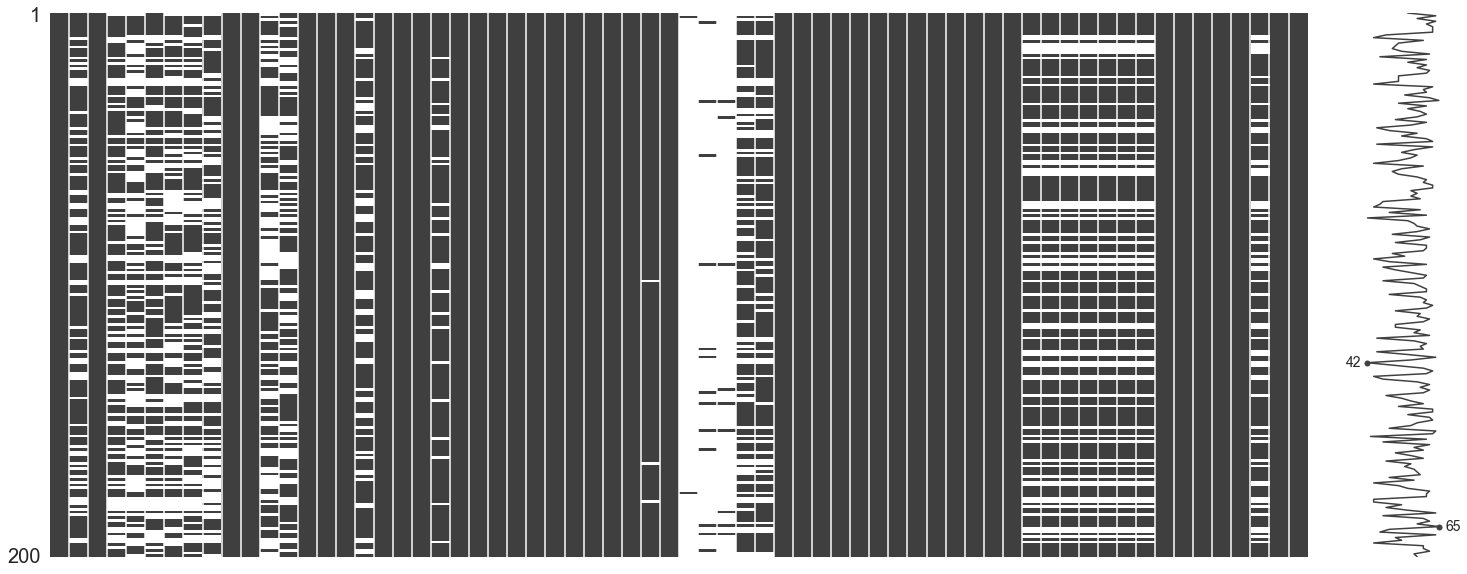

In [347]:
import missingno as msno
# missing value EDA
# reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
msno.matrix(pro_ms_train.sample(200))
plt.savefig('Missing value.png')
plt.show()

In [348]:
pro_ms_train.isnull().sum().sort_values(ascending=False)

square_feet                                     10579
monthly_discount                                10138
weekly_discount                                  9805
notes                                            6173
host_about                                       4784
access                                           4556
host_response_time                               4472
house_rules                                      4443
interaction                                      4074
neighborhood_overview                            3662
transit                                          3539
security_deposit_perc                            3451
host_neighbourhood                               3189
review_scores_checkin                            2913
review_scores_value                              2912
review_scores_location                           2912
review_scores_accuracy                           2909
review_scores_communication                      2903
review_scores_cleanliness   

In [349]:
# Percentage of missing values of each predictor in traning dataset
missingratio_train = pro_ms_train.isnull().sum() / len(pro_ms_train) *100
missingratio_train = missingratio_train.round(3)
missingratio_train.sort_values(ascending = False).to_csv('Missing value_train.csv')
missingratio_train.sort_values(ascending = False).round(3)

square_feet                                    99.473
monthly_discount                               95.327
weekly_discount                                92.196
notes                                          58.044
host_about                                     44.984
access                                         42.840
host_response_time                             42.050
house_rules                                    41.777
interaction                                    38.307
neighborhood_overview                          34.433
transit                                        33.277
security_deposit_perc                          32.449
host_neighbourhood                             29.986
review_scores_checkin                          27.391
review_scores_value                            27.381
review_scores_location                         27.381
review_scores_accuracy                         27.353
review_scores_communication                    27.297
review_scores_cleanliness   

In [350]:
pro_ms_test.isnull().sum().sort_values(ascending=False)

square_feet                                     24700
monthly_discount                                23645
weekly_discount                                 22864
notes                                           14367
host_about                                      11230
access                                          10576
host_response_time                              10424
house_rules                                     10241
interaction                                      9591
neighborhood_overview                            8515
transit                                          8263
security_deposit_perc                            7925
host_neighbourhood                               7325
review_scores_value                              6912
review_scores_checkin                            6907
review_scores_location                           6906
review_scores_accuracy                           6898
review_scores_communication                      6892
review_scores_cleanliness   

In [351]:
# Percentage of missing values of each predictor in test dataset
missingratio_train = pro_ms_test.isnull().sum() / len(pro_ms_test) *100
missingratio_train = missingratio_train.round(3)
missingratio_train.sort_values(ascending = False).to_csv('Missing value_test.csv')
missingratio_train.sort_values(ascending = False).round(3)


square_feet                                    99.525
monthly_discount                               95.274
weekly_discount                                92.127
notes                                          57.889
host_about                                     45.249
access                                         42.614
host_response_time                             42.002
house_rules                                    41.264
interaction                                    38.645
neighborhood_overview                          34.310
transit                                        33.294
security_deposit_perc                          31.932
host_neighbourhood                             29.515
review_scores_value                            27.851
review_scores_checkin                          27.831
review_scores_location                         27.827
review_scores_accuracy                         27.794
review_scores_communication                    27.770
review_scores_cleanliness   

Drop predictors with too much missing value

In [352]:
pro_ms_train = pro_ms_train.drop(['square_feet'],axis = 1)
pro_ms_test = pro_ms_test.drop (['square_feet'],axis = 1)

# review
pro_ms_train.columns

Index(['name', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'host_id',
       'host_since', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
       'weekly_discount', 'monthly_discount', 'security_deposit_perc',
       'cleaning_fee_perc', 'guests_included', 'extra_people_perc',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_score

### 2.6.1 Dealing with Missing Values in Categorical Variables

In [353]:
# make sure that all the varibales with misisng value are same in both test and train.
# all the variables name are temporary
a = pd.DataFrame(pro_ms_test.isnull().sum().sort_values(ascending = False))
a1 = a[a[0]!=0].index

b = pd.DataFrame(pro_ms_train.isnull().sum().sort_values(ascending = False))
b1 = b[b[0]!=0].index

ca = []
for a11 in a1:
    if a11 not in b1:
        ca.append(a11)
        
cb = []
for b11 in b1:
    if b11 not in a1:
        cb.append(b11)
print(f'missing value：{a1}' )
print(ca,cb)

missing value：Index(['monthly_discount', 'weekly_discount', 'notes', 'host_about', 'access',
       'host_response_time', 'house_rules', 'interaction',
       'neighborhood_overview', 'transit', 'security_deposit_perc',
       'host_neighbourhood', 'review_scores_value', 'review_scores_checkin',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_cleanliness',
       'review_scores_rating', 'space', 'reviews_per_month',
       'cleaning_fee_perc', 'neighbourhood', 'beds', 'city', 'bedrooms',
       'bathrooms'],
      dtype='object')
[] []


In [354]:
# missing values 
pro_ms_train[['notes', 'monthly_discount', 'weekly_discount','host_about', 'access', 'host_response_time',
       'house_rules', 'interaction', 'neighborhood_overview', 'transit',
       'security_deposit_perc', 'host_neighbourhood', 'review_scores_value',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating', 'space',
       'reviews_per_month', 'cleaning_fee_perc', 'neighbourhood', 'beds',
       'city', 'bedrooms', 'bathrooms']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   notes                        4462 non-null   object 
 1   monthly_discount             497 non-null    float64
 2   weekly_discount              830 non-null    float64
 3   host_about                   5851 non-null   object 
 4   access                       6079 non-null   object 
 5   host_response_time           6163 non-null   object 
 6   house_rules                  6192 non-null   object 
 7   interaction                  6561 non-null   object 
 8   neighborhood_overview        6973 non-null   object 
 9   transit                      7096 non-null   object 
 10  security_deposit_perc        7184 non-null   float64
 11  host_neighbourhood           7446 non-null   object 
 12  review_scores_value          7723 non-null   float64
 13  review_scores_ch

In [355]:
pro_ms_train[['notes', 'monthly_discount', 'weekly_discount', 'host_about', 'access', 'host_response_time',
       'house_rules', 'interaction', 'neighborhood_overview', 'transit',
       'security_deposit_perc', 'host_neighbourhood', 'review_scores_value',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating', 'space',
       'reviews_per_month', 'cleaning_fee_perc', 'neighbourhood', 'beds',
       'city', 'bedrooms', 'bathrooms']].head(10)

notes  monthly_discount  \
0  1, This is not the only room in the house bein...               nan   
1                                                NaN               nan   
2  If staying on Sunday night please put garbage ...               nan   
3                                                NaN               nan   
4                                                NaN               nan   
5  Prices and conditions featured on Airbnb are c...               nan   
6  To enter our home you do not need to go throug...               nan   
7                                                NaN               nan   
8  Please do let us know before hand if you would...               nan   
9  Note - The house has a self contained permanen...               nan   

   weekly_discount                                         host_about  \
0              nan  Just got back to Sydney in Jan 2019 after livi...   
1              nan                                                NaN   
2              nan  Hairstylist, fashion guru, Love beautiful thin...   
3              nan  We are a couple from Sweden and New Zealand wh...   
4              nan  I love beach and living outdoors! I enjoy divi...   
5              nan  4 continents, 27 countries, 60+ cities and tho...   
6              nan                                                NaN   
7              nan  I am a working mother of three.  We LOVE the c...   
8              nan  Hello everyone, I would like to welcome you to...   
9              nan  I am 51, married to Amanda, and we have two ad...   

                                              access  host_response_time  \
0  Family area, living area, laundry area, backya...      within an hour   
1                                                NaN                 NaN   
2        The whole house except for 2 private rooms.      within an hour   
3  Full apartment including balcony, washing mach...                 NaN   
4  We also offer all kitchen aplliance, beach cha...                 NaN   
5                              Full apartment access      within an hour   
6        Guests have entire access to the apartment.                 NaN   
7                                                NaN      within an hour   
8  The guest can have the entire place and common...      within an hour   
9                                                NaN  within a few hours   

                                         house_rules  \
0                                                NaN   
1                                                NaN   
2  When leaving please strip bed put all used lin...   
3  - No shoes inside - Be considerate of neighbou...   
4                    - Please, no shoes in the house   
5  Guests are able to relax and enjoy themselves ...   
6                                                NaN   
7                                                NaN   
8                            smoking at balcony only   
9                                                NaN   

                                         interaction  \
0  I don’t personally live in the house anymore a...   
1      Host 'll be available 24/7 on call and nearby   
2   Available for questions by email, phone or text.   
3  Hosts are contactable via text message but may...   
4                                                NaN   
5  If you have any questions at all in relation t...   
6  I will be available via phone or email to help...   
7  I live just up the road with my husband and th...   
8  This is a private apartment, so you get the wh...   
9  We respect your privacy so will not be around ...   

                               neighborhood_overview  \
0  There’s a massive Westfield shopping centre ne...   
1  Randwick junction is at 5 minutes walk with al...   
2  7 mins walk to train station, 1 stop to thrivi...   
3  Fairlight is a calm harbourside neighbourhood ...   
4  Our building has just 8 suits, so it's pretty ...   
5  A very vibrant nei

In [356]:
# missing value variables:
# ['notes', 'host_about', 'access', 'host_response_time',
#        'house_rules', 'interaction', 'neighborhood_overview', 'transit',
#        'security_deposit_perc', 'host_neighbourhood', 'review_scores_value',
#        'review_scores_checkin', 'review_scores_location',
#        'review_scores_accuracy', 'review_scores_communication',
#        'review_scores_cleanliness', 'review_scores_rating', 'space',
#        'reviews_per_month', 'cleaning_fee_perc', 'neighbourhood', 'beds',
#        'city', 'bedrooms', 'bathrooms']
#
# object_ms = ['access', 'house_rules','host_about','interaction','notes','host_response_time',
#             'neighborhood_overview', 'transit','host_neighbourhood','space', 'neighbourhood',
#             'city']

# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# Method1:encode missing value [0,1]
# ['notes','host_about','house_rule','interaction','neighborhood_overview'] --> [0,1]
pro_ms_train['notes']=pro_ms_train['notes'].isnull().astype(int)
pro_ms_train['host_about']=pro_ms_train['host_about'].isnull().astype(int)
pro_ms_train['house_rules']=pro_ms_train['house_rules'].isnull().astype(int)
pro_ms_train['interaction']=pro_ms_train['interaction'].isnull().astype(int)
pro_ms_train['neighborhood_overview']=pro_ms_train['neighborhood_overview'].isnull().astype(int)

# test data
pro_ms_test['notes']=pro_ms_test['notes'].isnull().astype(int)
pro_ms_test['host_about']=pro_ms_test['host_about'].isnull().astype(int)
pro_ms_test['house_rules']=pro_ms_test['house_rules'].isnull().astype(int)
pro_ms_test['interaction']=pro_ms_test['interaction'].isnull().astype(int)
pro_ms_test['neighborhood_overview']=pro_ms_test['neighborhood_overview'].isnull().astype(int)


# Method2: filling with "Unkown" ,"Others", "None"
# ['host_response_time']--> others
pro_ms_train['host_response_time']=pro_ms_train['host_response_time'].fillna('Others')
pro_ms_test['host_response_time']=pro_ms_test['host_response_time'].fillna('Others')

# ,'neighbourhood','host_neighbourhood' --> None
pro_ms_train[['neighbourhood','host_neighbourhood','city']]=pro_ms_train[['neighbourhood','host_neighbourhood','city']].fillna('none')
pro_ms_test[['neighbourhood','host_neighbourhood','city']]=pro_ms_test[['neighbourhood','host_neighbourhood','city']].fillna('none')

# 'transit' -->Unknown
pro_ms_train['transit']=pro_ms_train['transit'].fillna('Unknown')
pro_ms_test['transit']=pro_ms_test['transit'].fillna('Unknown')


# Method3:filling with the background analysis
# 'access'--> Whole
pro_ms_train['access']=pro_ms_train['access'].fillna('Whole')
pro_ms_test['access']=pro_ms_test['access'].fillna('Whole')

# 'space' --> All
pro_ms_train['space']=pro_ms_train['space'].fillna('All')
pro_ms_test['space']=pro_ms_test['space'].fillna('All')


### 2.6.2 Dealing with Missing Values in Numeric Predictors

In [357]:
pro_ms_train[['security_deposit_perc','monthly_discount', 'weekly_discount',
       'review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_cleanliness','review_scores_rating','reviews_per_month',
       'cleaning_fee_perc', 'beds', 'bedrooms', 'bathrooms']].shape

(10635, 15)

In [358]:
# ['notes',  'host_about', 'access', 'host_response_time',
#        'house_rules', 'interaction', 'neighborhood_overview', 'transit',
#        'security_deposit_perc', 'host_neighbourhood', 'review_scores_value',
#        'review_scores_checkin', 'review_scores_location',
#        'review_scores_accuracy', 'review_scores_communication',
#        'review_scores_cleanliness', 'review_scores_rating', 'space',
#        'reviews_per_month', 'cleaning_fee_perc', 'neighbourhood', 'beds',
#        'city', 'bedrooms', 'bathrooms']

pro_ms_train[['security_deposit_perc',
       'review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_cleanliness','review_scores_rating','reviews_per_month',
       'cleaning_fee_perc', 'beds', 'bedrooms', 'bathrooms']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security_deposit_perc        7184 non-null   float64
 1   review_scores_value          7723 non-null   float64
 2   review_scores_checkin        7722 non-null   float64
 3   review_scores_location       7723 non-null   float64
 4   review_scores_accuracy       7726 non-null   float64
 5   review_scores_communication  7732 non-null   float64
 6   review_scores_cleanliness    7733 non-null   float64
 7   review_scores_rating         7740 non-null   float64
 8   reviews_per_month            8042 non-null   float64
 9   cleaning_fee_perc            8125 non-null   float64
 10  beds                         10562 non-null  float64
 11  bedrooms                     10627 non-null  float64
 12  bathrooms                    10632 non-null  float64
dtypes: float64(13)
m

In [359]:
# float_ms = ['monthly_discount','weekly_discount','security_deposit_perc',
#        'review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy',
#        'review_scores_communication', 'review_scores_cleanliness','review_scores_rating','reviews_per_month',
#        'cleaning_fee_perc', 'beds', 'bedrooms', 'bathrooms']  

# Method1: missing value --> 0
#  'monthly_discount','weekly_discount',,'reviews_per_month' --> 0
ms_nu_col1 = ['monthly_discount','weekly_discount','reviews_per_month']
pro_ms_train[ms_nu_col1]=pro_ms_train[ms_nu_col1].fillna(0)
pro_ms_test[ms_nu_col1]=pro_ms_test[ms_nu_col1].fillna(0)

# reference: https://thispointer.com/pandas-apply-apply-a-function-to-each-row-column-in-dataframe/
# Method2: missing value --> mean/median/mode value
# 'cleaning_fee_perc','security_deposit_perc' --> mean value
ms_nu_col2 = ['cleaning_fee_perc','security_deposit_perc']
pro_ms_train['cleaning_fee_perc']=pro_ms_train['cleaning_fee_perc'].apply(lambda x: pro_ms_train['cleaning_fee_perc'].mean() if pd.isnull(x) else x)
pro_ms_test['cleaning_fee_perc']=pro_ms_test['cleaning_fee_perc'].apply(lambda x: pro_ms_test['cleaning_fee_perc'].mean() if pd.isnull(x) else x)

pro_ms_train['security_deposit_perc']=pro_ms_train['security_deposit_perc'].apply(lambda x: pro_ms_train['security_deposit_perc'].mean() if pd.isnull(x) else x)
pro_ms_test['security_deposit_perc']=pro_ms_test['security_deposit_perc'].apply(lambda x: pro_ms_test['security_deposit_perc'].mean() if pd.isnull(x) else x)


# 'beds','bedrooms','bathrooms' --> median value
pro_ms_train['beds']=pro_ms_train['beds'].apply(lambda x: pro_ms_train['beds'].median() if pd.isnull(x) else x)
pro_ms_test['beds']=pro_ms_test['beds'].apply(lambda x: pro_ms_test['beds'].median() if pd.isnull(x) else x)

pro_ms_train['bedrooms']=pro_ms_train['bedrooms'].apply(lambda x: pro_ms_train['bedrooms'].median() if pd.isnull(x) else x)
pro_ms_test['bedrooms']=pro_ms_test['bedrooms'].apply(lambda x: pro_ms_test['bedrooms'].median() if pd.isnull(x) else x)

pro_ms_train['bathrooms']=pro_ms_train['bathrooms'].apply(lambda x: pro_ms_train['bathrooms'].median() if pd.isnull(x) else x)
pro_ms_test['bathrooms']=pro_ms_test['bathrooms'].apply(lambda x: pro_ms_test['bathrooms'].median() if pd.isnull(x) else x)


# Method3: imputation
# 'review_scores_value','review_scores_checkin','review_scores_location','review_scores_accuracy'
# 'review_scores_communication','review_scores_cleanliness','review_scores_rating',
#  --> imputation

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Handle with the null value by imputation method.
ms_nu_col3 = ['review_scores_value','review_scores_checkin','review_scores_location',
              'review_scores_accuracy','review_scores_communication','review_scores_cleanliness',
              'review_scores_rating']
imp_train = pro_ms_test.loc[:,ms_nu_col3] 

impute = IterativeImputer()
impute.fit(imp_train)
pro_ms_train[ms_nu_col3]=impute.transform(pro_ms_train[ms_nu_col3])
pro_ms_test[ms_nu_col3]=impute.transform(pro_ms_test[ms_nu_col3])

In [360]:
pro_ms_train.T.head(58)
# all the missing values has been handled

0      \
name                             Brand New House with Private Bathroom Miranda   
space                        Guests are welcomed to use all amenities avail...   
description                  New house built in (Phone number hidden by Air...   
neighborhood_overview                                                        0   
notes                                                                        0   
transit                      Miranda train station is about 10-15 mins walk...   
access                       Family area, living area, laundry area, backya...   
interaction                                                                  0   
house_rules                                                                  1   
host_id                                                               50605711   
host_since                                                                1531   
host_about                                                                   0   
host_response_time                                              within an hour   
host_response_rate                                                       1.000   
host_acceptance_rate                                                     1.000   
host_is_superhost                                                            f   
host_neighbourhood                                                        none   
host_listings_count                                                      5.000   
host_verifications           ['email', 'phone', 'jumio', 'offline_governmen...   
host_identity_verified                                                       f   
neighbourhood                                                             none   
neighbourhood_cleansed                                        Sutherland Shire   
city                                                                   Miranda   
latitude                                                               -34.029   
longitude                                                              151.102   
is_location_exact                                                            t   
property_type                                                            House   
room_type                                                         Private room   
accommodates                                                                 2   
bathrooms                                                                1.000   
bedrooms                                                                 1.000   
beds                                                                     1.000   
amenities                    {TV,Kitchen,"Free parking on premises",Breakfa...   
weekly_discount                                                          0.000   
monthly_discount                                                         0.000   
security_deposit_perc                                                  203.000   
cleaning_fee_perc                                                        0.000   
guests_included                                                              1   
extra_people_perc                                                        0.000   
minimum_nights                                                               1   
maximum_nights                                                            1125   
maximum_minimum_nights                                                       1   
minimum_nights_avg_ntm                                                   1.000   
maximum_nights_avg_ntm                                                1125.000   
availability_30                                                             22   
availability_60                                                             43   
availability_90                                                             43   
availability_365                                                            43   
number_of_reviews                                      

In [361]:
pro_ms_train.isnull().sum()

name                                            0
space                                           0
description                                     0
neighborhood_overview                           0
notes                                           0
transit                                         0
access                                          0
interaction                                     0
house_rules                                     0
host_id                                         0
host_since                                      0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_verifications                              0
host_identity_verified                          0


# 3. Feature engineer + EDA

In [362]:
# data backup
train_fe = pro_ms_train.copy()
test_fe = pro_ms_test.copy()
train_fe.shape

(10635, 65)

In [363]:
# datatype review
train_fe_type =  detect_types(train_fe)
train_fe_type.head(58)

continuous  dirty_float  low_card_int  \
name                              False        False         False   
space                             False        False         False   
description                       False        False         False   
neighborhood_overview             False        False         False   
notes                             False        False         False   
transit                           False        False         False   
access                            False        False         False   
interaction                       False        False         False   
house_rules                       False        False         False   
host_id                            True        False         False   
host_since                         True        False         False   
host_about                        False        False         False   
host_response_time                False        False         False   
host_response_rate                 True        False         False   
host_acceptance_rate               True        False         False   
host_is_superhost                 False        False         False   
host_neighbourhood                False        False         False   
host_listings_count               False        False          True   
host_verifications                False        False         False   
host_identity_verified            False        False         False   
neighbourhood                     False        False         False   
neighbourhood_cleansed            False        False         False   
city                              False        False         False   
latitude                           True        False         False   
longitude                          True        False         False   
is_location_exact                 False        False         False   
property_type                     False        False         False   
room_type                         False        False         False   
accommodates                      False        False          True   
bathrooms                          True        False         False   
bedrooms                          False        False          True   
beds                              False        False          True   
amenities                         False        False         False   
weekly_discount                    True        False         False   
monthly_discount                  False        False         False   
security_deposit_perc              True        False         False   
cleaning_fee_perc                  True        False         False   
guests_included                   False        False          True   
extra_people_perc                  True        False         False   
minimum_nights                    False        False          True   
maximum_nights                     True        False         False   
maximum_minimum_nights            False        False          True   
minimum_nights_avg_ntm             True        False         False   
maximum_nights_avg_ntm             True        False         False   
availability_30                   False        False          True   
availability_60                   False        False          True   
availability_90                   False        False          True   
availability_365                   True        False         False   
number_of_reviews                  True        False         False   
number_of_reviews_ltm             False        False          True   
review_scores_rating               True        False         False   
review_scores_accuracy             True        False         False   
review_scores_cleanliness          True        False         False   
review_scores_checkin              True        False         False   
review_scores_communication        True        False         False   
review_scores_location             True        False         False   
review_scores_value                True

## 3.1 Transformation of the Response Variable

Log price to reduce the skewness.

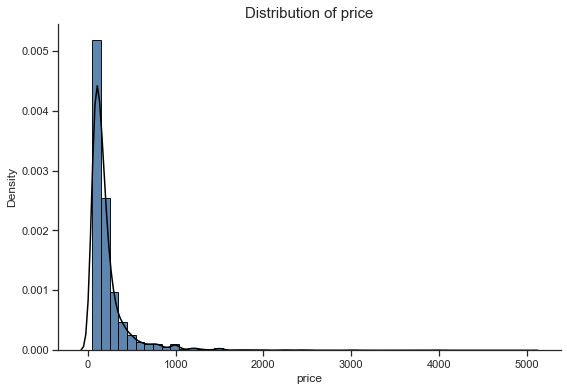

In [364]:
from statlearning import plot_dist

# reference : tutorials
fig, ax  = plot_dist(train_fe['price'])
ax.set_title('Distribution of price', fontsize = 15)
plt.savefig('Distribution of Price.png')
plt.show()

In [365]:
train_fe['price'].describe().round(2)

count   10635.000
mean      217.970
std       269.450
min        51.000
25%        89.000
50%       144.000
75%       231.000
max      5000.000
Name: price, dtype: float64

In [366]:
train_fe['price'].skew().round(4)

5.6614

In [367]:
train_fe['price'].kurtosis().round(4)

51.6606

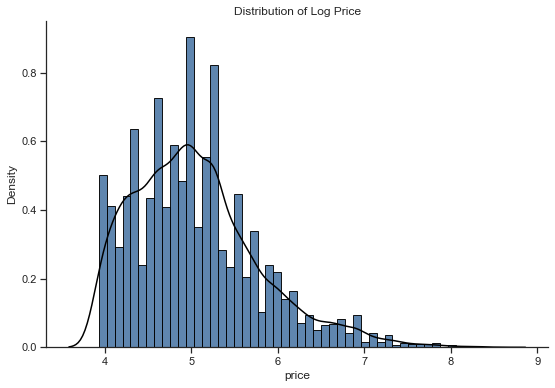

In [368]:
# log transformation
train_fe['price'] = np.log(train_fe['price'])
response = 'price'

fig, ax  = plot_dist(train_fe[response])
ax.set_title('Distribution of Log Price')
plt.show()

## 3.2 Feature Engineering on Predictors

In [369]:
#divide variables into different categories mannually.

string = ['name','space','description','transit','access','host_verifications','amenities']

categorical = ['neighborhood_overview','notes','interaction','house_rules','host_about','host_response_time',
 'host_is_superhost','host_neighbourhood','host_identity_verified','neighbourhood','neighbourhood_cleansed',
 'is_location_exact','property_type','room_type','instant_bookable','cancellation_policy',"city"]

low_card = ['host_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included',
 'calculated_host_listings_count_private_rooms']

continuous = ['host_id','host_response_rate','host_acceptance_rate','latitude','longitude','weekly_discount','monthly_discount',
 'security_deposit_perc','cleaning_fee_perc','extra_people_perc','minimum_nights','maximum_nights',
 'maximum_minimum_nights','availability_30','availability_365','number_of_reviews','number_of_reviews_ltm',
 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
 'review_scores_communication','review_scores_location','review_scores_value','minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm','availability_60','availability_90',
'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
 'reviews_per_month','review_lag','host_since']

response = 'price'

In [370]:
train_fe[continuous].T.head(50).round(3)

0             1      \
host_id                                     50605711.000 120832230.000   
host_response_rate                                 1.000         0.000   
host_acceptance_rate                               1.000         0.000   
latitude                                         -34.029       -33.915   
longitude                                        151.102       151.237   
weekly_discount                                    0.000         0.000   
monthly_discount                                   0.000         0.000   
security_deposit_perc                            203.000       216.140   
cleaning_fee_perc                                  0.000        51.774   
extra_people_perc                                  0.000         0.000   
minimum_nights                                     1.000         3.000   
maximum_nights                                  1125.000        26.000   
maximum_minimum_nights                             1.000         3.000   
availability_30                                   22.000         0.000   
availability_365                                  43.000         0.000   
number_of_reviews                                 48.000         0.000   
number_of_reviews_ltm                             48.000         0.000   
review_scores_rating                              95.000        93.392   
review_scores_accuracy                            10.000         9.559   
review_scores_cleanliness                         10.000         9.252   
review_scores_checkin                             10.000         9.713   
review_scores_communication                       10.000         9.723   
review_scores_location                             9.000         9.729   
review_scores_value                               10.000         9.322   
minimum_nights_avg_ntm                             1.000         3.000   
maximum_nights_avg_ntm                          1125.000        26.000   
availability_60                                   43.000         0.000   
availability_90                                   43.000         0.000   
calculated_host_listings_count                     4.000         1.000   
calculated_host_listings_count_entire_homes        0.000         0.000   
reviews_per_month                                  4.350         0.000   
review_lag                                       308.000         0.000   
host_since                                      1531.000      1065.000   

                                                   2             3      \
host_id                                     35339631.000 115440332.000   
host_response_rate                                 1.000         0.000   
host_acceptance_rate                               1.000         0.000   
latitude                                         -33.888       -33.800   
longitude                                        151.167       151.273   
weekly_discount                                    0.000         0.000   
monthly_discount                                   0.000         0.000   
security_deposit_perc                            568.000       513.000   
cleaning_fee_perc                                102.000        21.000   
extra_people_perc                                  0.000        10.000   
minimum_nights                                     1.000         5.000   
maximum_nights                                  1125.000      1125.000   
maximum_minimum_nights                             1.000         5.000   
availability_30                                    0.000         0.000   
availability_365                                  40.000         0.000   
number_of_reviews                                  0.000        12.000   
number_of_reviews_ltm                              0.000         0.000   
review_scores_rating                              93.392        98.000   
review_scores_accuracy                             9.559        10.000   
review_scores_cleanliness                          9.2

In [371]:
len(string + continuous + categorical+ low_card + [response])

65

In [372]:
train_fe.shape

(10635, 65)

### 3.2.1. Dealing with “string” predictor variables

In [373]:
# method1: subtitute the length of values
train_fe['name'] = train_fe['name'].apply(lambda sen:len([x for x in sen.split()if x.isupper()])) 
train_fe['space'] = train_fe['space'].apply(lambda x: len([x for x in x.split()if x.isdigit()])) 
train_fe['transit'] = train_fe['transit'].apply(lambda x:len(x.split())).values
train_fe['host_verifications'] = train_fe['host_verifications'].apply(lambda x:len(x.split(","))) 
train_fe['amenities'] = train_fe['amenities'].apply(lambda x:len(x.split(",")))

# method2: count the key words.
import re

# reference:https://stackoverflow.com/questions/17090144/python-regex-to-match-a-specific-word
count_new_train = []
for i in train_fe['description']:
    result_train = re.findall(r'(new|comfort|good|nice|enjoy|close|available|furnished|easy|comfortable|free)',i) #re is a package
    count_rev_train = len(result_train)
    count_new_train.append(count_rev_train)
train_fe['description'] = count_new_train

access_train = []
for i in train_fe['access']:
    result_train = re.findall(r'(Full|full|Whole|whole|All|all|free|entire|private|available|enjoy|swimming|fully|equipped|provided|accessible)',i)
    access_count_train = len(result_train) != 0
    access_train.append(int(access_count_train))
train_fe['access'] = access_train

In [374]:
train_fe[string].head()

name  space  description  transit  access  host_verifications  amenities
0     0      0            2        9       1                   7         17
1     0      0            1       17       1                   2         14
2     0      1            0       21       1                   7         39
3     0      1            2       66       1                   3         30
4     0      0            1       49       1                   4         13

In [375]:
# same operation with test data.
test_fe['space'] = test_fe['space'].apply(lambda x: len([x for x in x.split()if x.isdigit()])) 
test_fe['name'] = test_fe['name'].apply(lambda sen:len([x for x in sen.split()if x.isupper()])) 
test_fe['transit'] = test_fe['transit'].apply(lambda x:len(x.split())).values
test_fe['host_verifications'] = test_fe['host_verifications'].apply(lambda x:len(x.split(","))) 
test_fe['amenities'] = test_fe['amenities'].apply(lambda x:len(x.split(",")))


count_new_test = []
for i in test_fe['description']:
    result_test = re.findall(r'(new|comfort|good|nice|enjoy|close|available|furnished|easy|comfortable|free)',i) #re is a package
    count_rev_test = len(result_test)
    count_new_test.append(count_rev_test)
test_fe['description'] = count_new_test

access_test = []
for i in test_fe['access']:
    result_test = re.findall(r'(Full|full|Whole|whole|All|all|free|entire|private|available|enjoy|swimming|fully|equipped|provided|accessible)',i)
    access_count_test = len(result_test) != 0
    access_test.append(int(access_count_test))
test_fe['access'] = access_test

In [376]:
train_fe.shape

(10635, 65)

In [377]:
test_fe.shape

(24818, 64)

### 3.2.2 Dealing with “Categorical” predictor variables

In [378]:
train_fe.T.head()

0     1     2     3     4     5     6     7     8      \
name                      0     0     0     0     0     0     0     0     1   
space                     0     0     1     1     0     2     2     1     1   
description               2     1     0     2     1     0     3     3     4   
neighborhood_overview     0     0     0     0     0     0     0     0     0   
notes                     0     1     0     1     1     0     0     1     0   

                      9     10    11    12    13    14    15    16    17     \
name                      0     0     0     0     0     1     0     0     0   
space                     1     0     5     0     0     0     0     0     0   
description               4     5     2     0     0     0     4     7     0   
neighborhood_overview     0     0     0     1     0     1     1     0     1   
notes                     0     0     0     1     1     1     1     1     1   

                      18    19    20    21    22    23    24    25    26     \
name                      0     0     1     0     0     0     0     1     0   
space                     0     0     1     0     0     1     0     0     0   
description               1     6     1    13     4     0     4     3     2   
neighborhood_overview     0     0     0     0     0     0     0     1     1   
notes                     1     1     1     0     0     0     1     0     1   

                      27    28    29    30    31    32    33    34    35     \
name                      0     0     2     0     0     0     0     1     0   
space                     0     1     1     0     0     0     1     0     0   
description               0     4     3     2     5     5     4     0     0   
neighborhood_overview     0     0     0     0     0     1     1     1     0   
notes                     1     0     0     0     0     1     1     1     0   

                      36    37    38    39    40    41    42    43    44     \
name                      0     0     0     0     0     0     0     2     0   
space                     0     0     0     0     1     0     0     0     0   
description               4     2     2     2     3     2     2     4     3   
neighborhood_overview     0     1     0     0     0     1     0     0     0   
notes                     1     1     0     0     0     1     0     0     1   

                      45    46    47    48    49     ... 10585 10586 10587  \
name                      1     0     0     0     0  ...     4     0     1   
space                     0     0     0     0     1  ...     0     2     7   
description               0     0     2     1     3  ...     4     2     1   
neighborhood_overview     1     1     0     0     0  ...     1     0     1   
notes                     1     0     1     1     0  ...     1     1     1   

                      10588 10589 10590 10591 10592 10593 10594 10595 10596  \
name                      0     0     1     0     0     0     0     0     0   
space                     0     0     3     0     0     1     1     0     1   
description               1     0     1     1     2     1     0     2     3   
neighborhood_overview     1     1     0     1     0     0     1     0     0   
notes                     1     1     0     1     0     0     1     1     1   

                      10597 10598 10599 10600 10601 10602 10603 10604 10605  \
name                      0     0     0     0     0     0     1     0     0   
space                     1     1     0     0     0     4     0     1     0   
description               2     3     1     0     0     4     3     1     2   
neighborhood_overview     0     1     0     1     1     0     1     1     1   
notes                     1     1     1     0     1     0     1     0     1   

                      10606 10607 10608 10609 10610 10611 10612 10613 10614  \
name                      0     0     0     0     1     0     0     0     0   
space                     0     0     1     4     0     4     1     0 


**different data review.**

categorical_sp = ['neighbourhood_cleansed','property_typeproperty_type','cancellation_policy']

categorical_hc = ['host_neighbourhood','neighbourhood','city']

categorical_dm = ['neighborhood_overview', 'notes', 'interaction', 'house_rules',
       'host_about', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'is_location_exact', 'room_type',
       'instant_bookable']

In [379]:
train_fe['property_type'].value_counts()

Apartment                 6439
House                     2692
Townhouse                  451
Guest suite                216
Condominium                208
Guesthouse                 155
Villa                       75
Serviced apartment          63
Loft                        58
Bungalow                    51
Boutique hotel              48
Cottage                     42
Hostel                      21
Tiny house                  20
Bed and breakfast           19
Cabin                       19
Other                       14
Hotel                       14
Boat                        11
Camper/RV                    4
Aparthotel                   4
Farm stay                    3
Island                       2
Earth house                  2
Train                        1
Heritage hotel (India)       1
Castle                       1
Yurt                         1
Name: property_type, dtype: int64

In [380]:
train_fe[categorical].nunique()

neighborhood_overview       2
notes                       2
interaction                 2
house_rules                 2
host_about                  2
host_response_time          5
host_is_superhost           2
host_neighbourhood        193
host_identity_verified      2
neighbourhood             167
neighbourhood_cleansed     38
is_location_exact           2
property_type              28
room_type                   4
instant_bookable            2
cancellation_policy         7
city                      546
dtype: int64

In [381]:
# select the variable
train_fe[categorical].nunique()[train_fe[categorical].nunique()<=5].index

Index(['neighborhood_overview', 'notes', 'interaction', 'house_rules',
       'host_about', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'is_location_exact', 'room_type',
       'instant_bookable'],
      dtype='object')

In [382]:
# divide the variables into differnt datetype according to the data content.
categorical_sp = ['neighbourhood_cleansed','property_type','cancellation_policy']

categorical_hc = ['host_neighbourhood','neighbourhood','city']

categorical_dm = ['neighborhood_overview', 'notes', 'interaction', 'house_rules',
       'host_about', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'is_location_exact', 'room_type',
       'instant_bookable']

In [383]:
len(categorical_dm + categorical_sp + categorical_hc)

17

In [384]:
len(categorical)

17

**Sparse predictors:** Combine insiginificant values into "Other"

In [385]:
categorical_sp

['neighbourhood_cleansed', 'property_type', 'cancellation_policy']

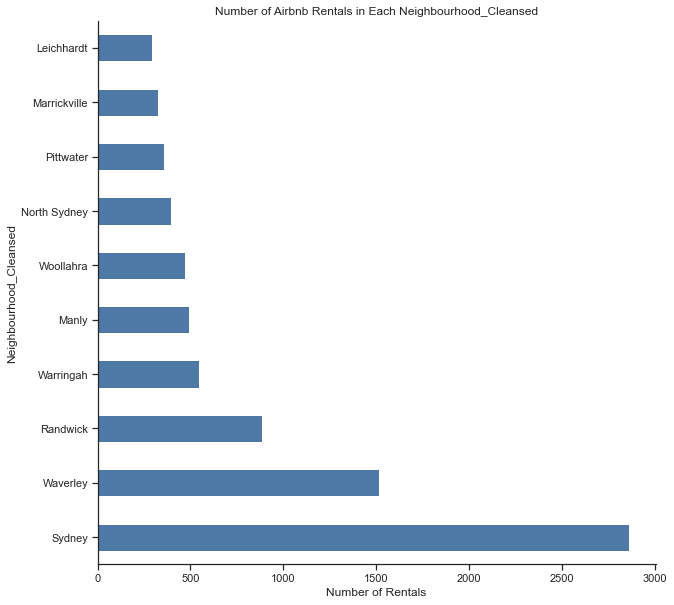

In [386]:
# EDA
plt.figure(figsize=(10,10))
train_fe[categorical_sp[0]].value_counts()[:10].plot(kind='barh')# change the [0] for different variables
plt.xlabel('Number of Rentals')
plt.ylabel('Neighbourhood_Cleansed')
plt.title('Number of Airbnb Rentals in Each Neighbourhood_Cleansed')
sns.despine()
plt.savefig('Neighbourhood_cleansed.png')
plt.show()

In [387]:
# combine the significant variables into others
for i in categorical_sp[:2]:
    
    remained_values = train_fe[i].value_counts().index[:10] 
    train_fe[i] = train_fe[i].apply(lambda x:'Other' if x not in remained_values else x)
    # test
    test_fe[i] = test_fe[i].apply(lambda x:'Other' if x not in remained_values else x)

Combine insiginificant values into different categories

In [388]:
train_fe['cancellation_policy'].value_counts()

strict_14_with_grace_period    4657
flexible                       3213
moderate                       2667
super_strict_60                  66
super_strict_30                  29
luxury_super_strict_125           2
luxury_moderate                   1
Name: cancellation_policy, dtype: int64

In [389]:
test_fe['cancellation_policy'].value_counts()

strict_14_with_grace_period    10887
flexible                        7645
moderate                        6077
super_strict_60                  130
super_strict_30                   72
luxury_moderate                    3
luxury_no_refund                   2
luxury_super_strict_125            1
strict                             1
Name: cancellation_policy, dtype: int64

In [390]:
# function: recombine values into new categories.
# reference: tutorial
def Sparse_FE(col_name, data, new_cate, old_cate):
    
    data[col_name] = data[col_name].astype('category') # transform the datatype
    data[col_name].cat.add_categories(new_cate, inplace=True) #add new categories
    
    counts = data[col_name].value_counts() 
    for level in counts.index: # loop for each value
        if level in old_cate:
            data.loc[data[col_name] == level, col_name] = new_cate
            
    data[col_name].cat.remove_unused_categories(inplace=True) #delete unused categories

In [391]:
# Define the new categories
strict = ['strict_14_with_grace_period','super_strict_60','super_strict_30','luxury_super_strict_125','luxury_no_refund','strict']
moderate = ['luxury_moderate','moderate']
flexible = ['flexible']

# Funtion
Sparse_FE(col_name = 'cancellation_policy', data = train_fe, new_cate = 'strict_policy', old_cate = strict)
Sparse_FE(col_name = 'cancellation_policy', data = train_fe, new_cate = 'moderate_policy', old_cate = moderate)
Sparse_FE(col_name = 'cancellation_policy', data = train_fe, new_cate = 'flexible_policy', old_cate = flexible)

#test
Sparse_FE(col_name = 'cancellation_policy', data = test_fe, new_cate = 'strict_policy', old_cate = strict)
Sparse_FE(col_name = 'cancellation_policy', data = test_fe, new_cate = 'moderate_policy', old_cate = moderate)
Sparse_FE(col_name = 'cancellation_policy', data = test_fe, new_cate = 'flexible_policy', old_cate = flexible)

In [392]:
train_fe['cancellation_policy'].value_counts()

strict_policy      4754
flexible_policy    3213
moderate_policy    2668
Name: cancellation_policy, dtype: int64

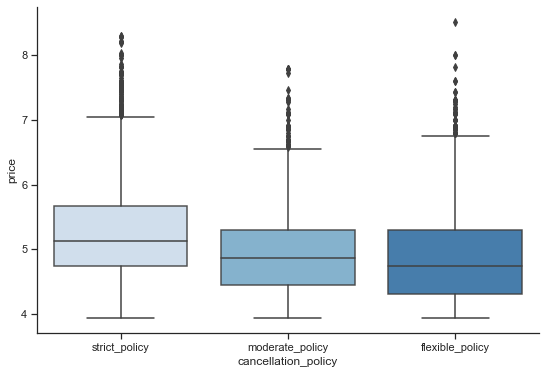

In [393]:
sns.boxplot(x = train_fe['cancellation_policy'],y =train_fe[response] ,boxprops=dict(alpha=.9),palette='Blues')
sns.despine()
plt.savefig('Cancellation_policy.png')
plt.show()

High cardinality predictors

EDA

In [394]:
train_fe[categorical_hc].nunique()

host_neighbourhood    193
neighbourhood         167
city                  546
dtype: int64

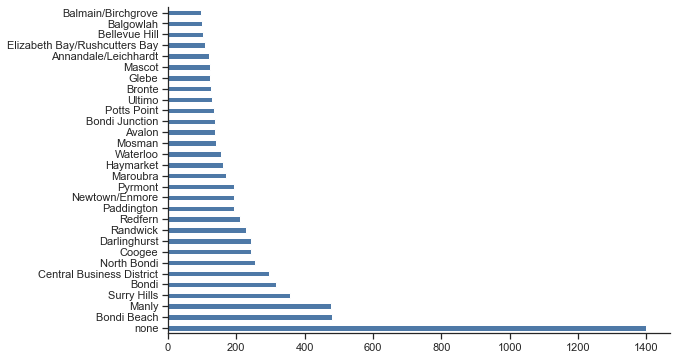

In [395]:
# review the data
train_fe['neighbourhood'].value_counts()[:30].plot(kind='barh')
sns.despine()
plt.savefig('Neighbourhood.png')
plt.show()

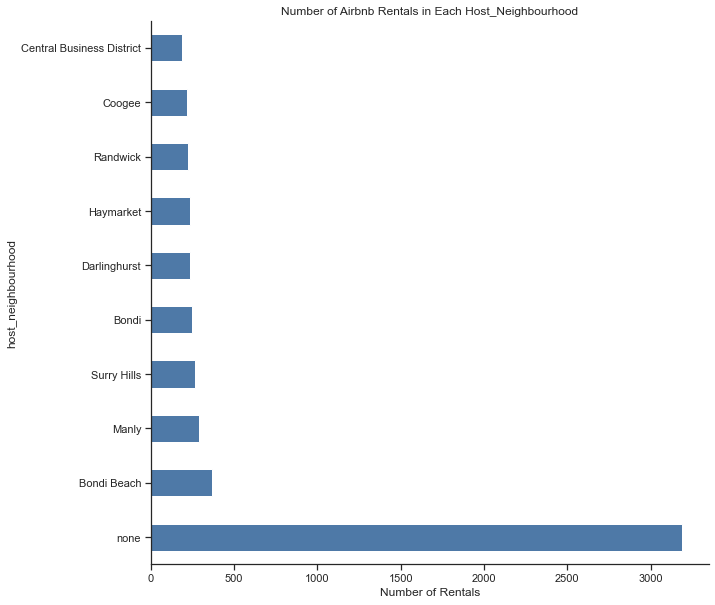

In [396]:
plt.figure(figsize=(10,10))
train_fe['host_neighbourhood'].value_counts()[:10].plot(kind='barh')
plt.xlabel('Number of Rentals')
plt.ylabel('host_neighbourhood')
plt.title('Number of Airbnb Rentals in Each Host_Neighbourhood')
sns.despine()
plt.savefig('Host_neighbourhood.png')
plt.show()

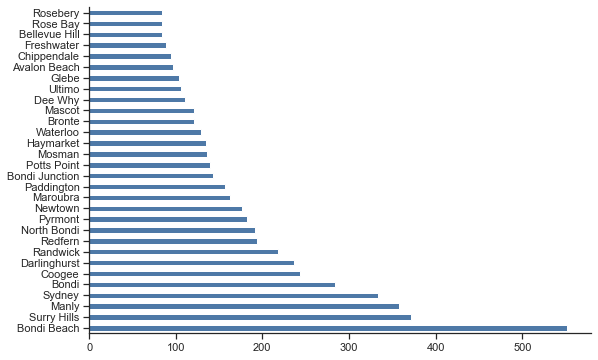

In [397]:
train_fe['city'].value_counts()[:30].plot(kind='barh')
sns.despine()
plt.savefig('City.png')
plt.show()

GLMMEncoding

In [398]:
from category_encoders.glmm import GLMMEncoder
# neighbourhood
GLMM_X2, GLMM_y2 = train_fe.loc[:,'neighbourhood'], train_fe.loc[:, 'price']
glmm2 = GLMMEncoder().fit(GLMM_X2, GLMM_y2) # we must use the training set for this

train_fe['neighbourhood'+'GLMM'] = glmm2.transform(train_fe['neighbourhood']) # new column for transfered value.
test_fe['neighbourhood'+'GLMM'] = glmm2.transform(test_fe['neighbourhood'])

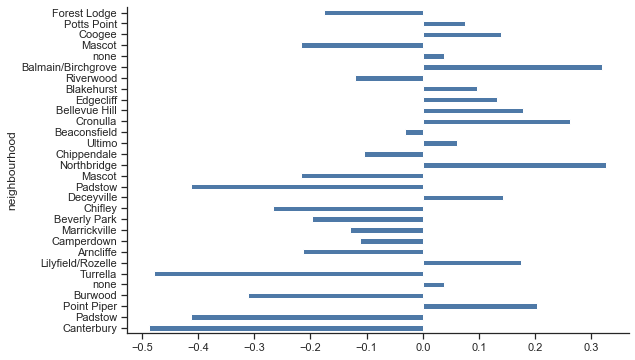

In [399]:
# review the result of GLMME encoding method
train_fe.groupby('neighbourhood')['neighbourhoodGLMM'].mean().sort_values().iloc[np.random.randint(0,150,30)].plot(kind='barh')
sns.despine()
plt.savefig('Neighbourhood GLMM.png')
plt.show()

In [400]:
# host_neighbourhood
GLMM_X1, GLMM_y1 = train_fe.loc[:,'host_neighbourhood'], train_fe.loc[:, 'price']
glmm1 = GLMMEncoder().fit(GLMM_X1, GLMM_y1) # we must use the training set for this

# reference: tutorial
train_fe['host_neighbourhood'+'GLMM'] = glmm1.transform(train_fe['host_neighbourhood']) # new column for transfered value.
test_fe['host_neighbourhood'+'GLMM'] = glmm1.transform(test_fe['host_neighbourhood'])

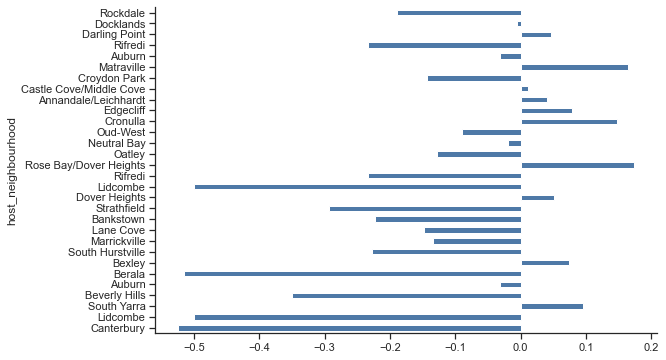

In [401]:
train_fe.groupby('host_neighbourhood')['host_neighbourhoodGLMM'].mean().sort_values().iloc[np.random.randint(0,150,30)].plot(kind='barh')
sns.despine()
plt.savefig('Host_neighbourhoodGLMM')
plt.show()

In [402]:
# city
GLMM_X1, GLMM_y1 = train_fe.loc[:,'city'], train_fe.loc[:, 'price']
glmm1 = GLMMEncoder().fit(GLMM_X1, GLMM_y1) # we must use the training set for this

train_fe['city'+'GLMM'] = glmm1.transform(train_fe['city']) # new column for transfered value.
test_fe['city'+'GLMM'] = glmm1.transform(test_fe['city'])

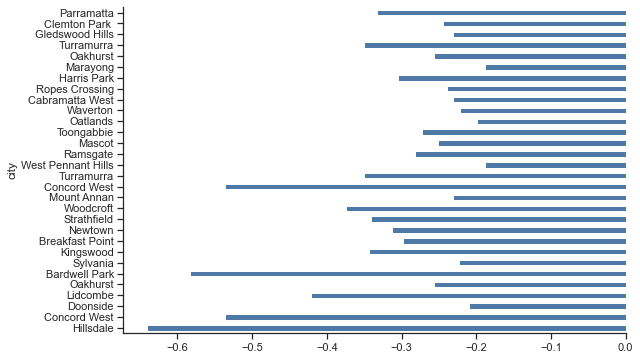

In [403]:
train_fe.groupby('city')['cityGLMM'].mean().sort_values().iloc[np.random.randint(0,150,30)].plot(kind='barh')
sns.despine()
plt.savefig('City.png')
plt.show()

In [404]:
# update the list, have the GLMM variable as continuous
categorical = list(set(categorical) - set(categorical_hc))
continuous.append('host_neighbourhoodGLMM')
continuous.append('neighbourhoodGLMM')
continuous.append('cityGLMM')

In [405]:
train_fe['neighbourhoodGLMM'].head()

0    0.038
1   -0.006
2   -0.257
3    0.266
4    0.038
Name: neighbourhoodGLMM, dtype: float64

Get dummy variable

In [406]:
train_fe[categorical].nunique()

host_identity_verified     2
notes                      2
instant_bookable           2
host_response_time         5
is_location_exact          2
neighborhood_overview      2
cancellation_policy        3
host_about                 2
room_type                  4
neighbourhood_cleansed    11
host_is_superhost          2
property_type             11
house_rules                2
interaction                2
dtype: int64

In [407]:
# get dummry varibales
train_dm = pd.get_dummies(train_fe[categorical],drop_first=True)
# test
test_dm = pd.get_dummies(test_fe[categorical],drop_first=True)

In [408]:
train_dm.head()

notes  neighborhood_overview  host_about  house_rules  interaction  \
0      0                      0           0            1            0   
1      1                      0           1            1            0   
2      0                      0           0            0            0   
3      1                      0           0            0            0   
4      1                      0           0            0            1   

   host_identity_verified_t  instant_bookable_t  \
0                         0                   1   
1                         0                   0   
2                         0                   0   
3                         0                   0   
4                         0                   0   

   host_response_time_a few days or more  host_response_time_within a day  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   host_response_time_within a few hours  host_response_time_within an hour  \
0                                      0                                  1   
1                                      0                                  0   
2                                      0                                  1   
3                                      0                                  0   
4                                      0                                  0   

   is_location_exact_t  cancellation_policy_moderate_policy  \
0                    1                                    0   
1                    1                                    0   
2                    1                                    0   
3                    1                                    0   
4                    1                                    0   

   cancellation_policy_flexible_policy  room_type_Hotel room  \
0                                    0                     0   
1                                    0                     0   
2                                    0                     0   
3                                    0                     0   
4                                    1                     0   

   room_type_Private room  room_type_Shared room  \
0                       1                      0   
1                       1                      0   
2                       0                      0   
3                       0                      0   
4                       1                      0   

   neighbourhood_cleansed_Manly  neighbourhood_cleansed_Marrickville  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    1   
3                             1                                    0   
4                             0                                    0   

   neighbourhood_cleansed_North Sydney  neighbourhood_cleansed_Other  \
0                                    0                             1   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   neighbourhood_cleansed_Pittwater  neighbourhood_cleansed_Randwick  \
0                                 0                                0   
1                                 0                                1   
2                                 0                                0   
3                                 0                                0   
4               

In [409]:
test_dm.columns.shape

(38,)

In [410]:
# make sure all the dummry are same in both test and train data.
test_del = []
for i in test_dm.columns:
    if i not in train_dm.columns:
        test_del.append(i)
test_del

[]

In [411]:
test_dm.columns.shape

(38,)

In [412]:
train_del = []
for i in train_dm.columns:
    if i not in test_dm.columns:
        train_del.append(i)
train_del

[]

### 3.2.3 Dealing with “continuous” predictor variables

#### 3.2.3.1 EDA

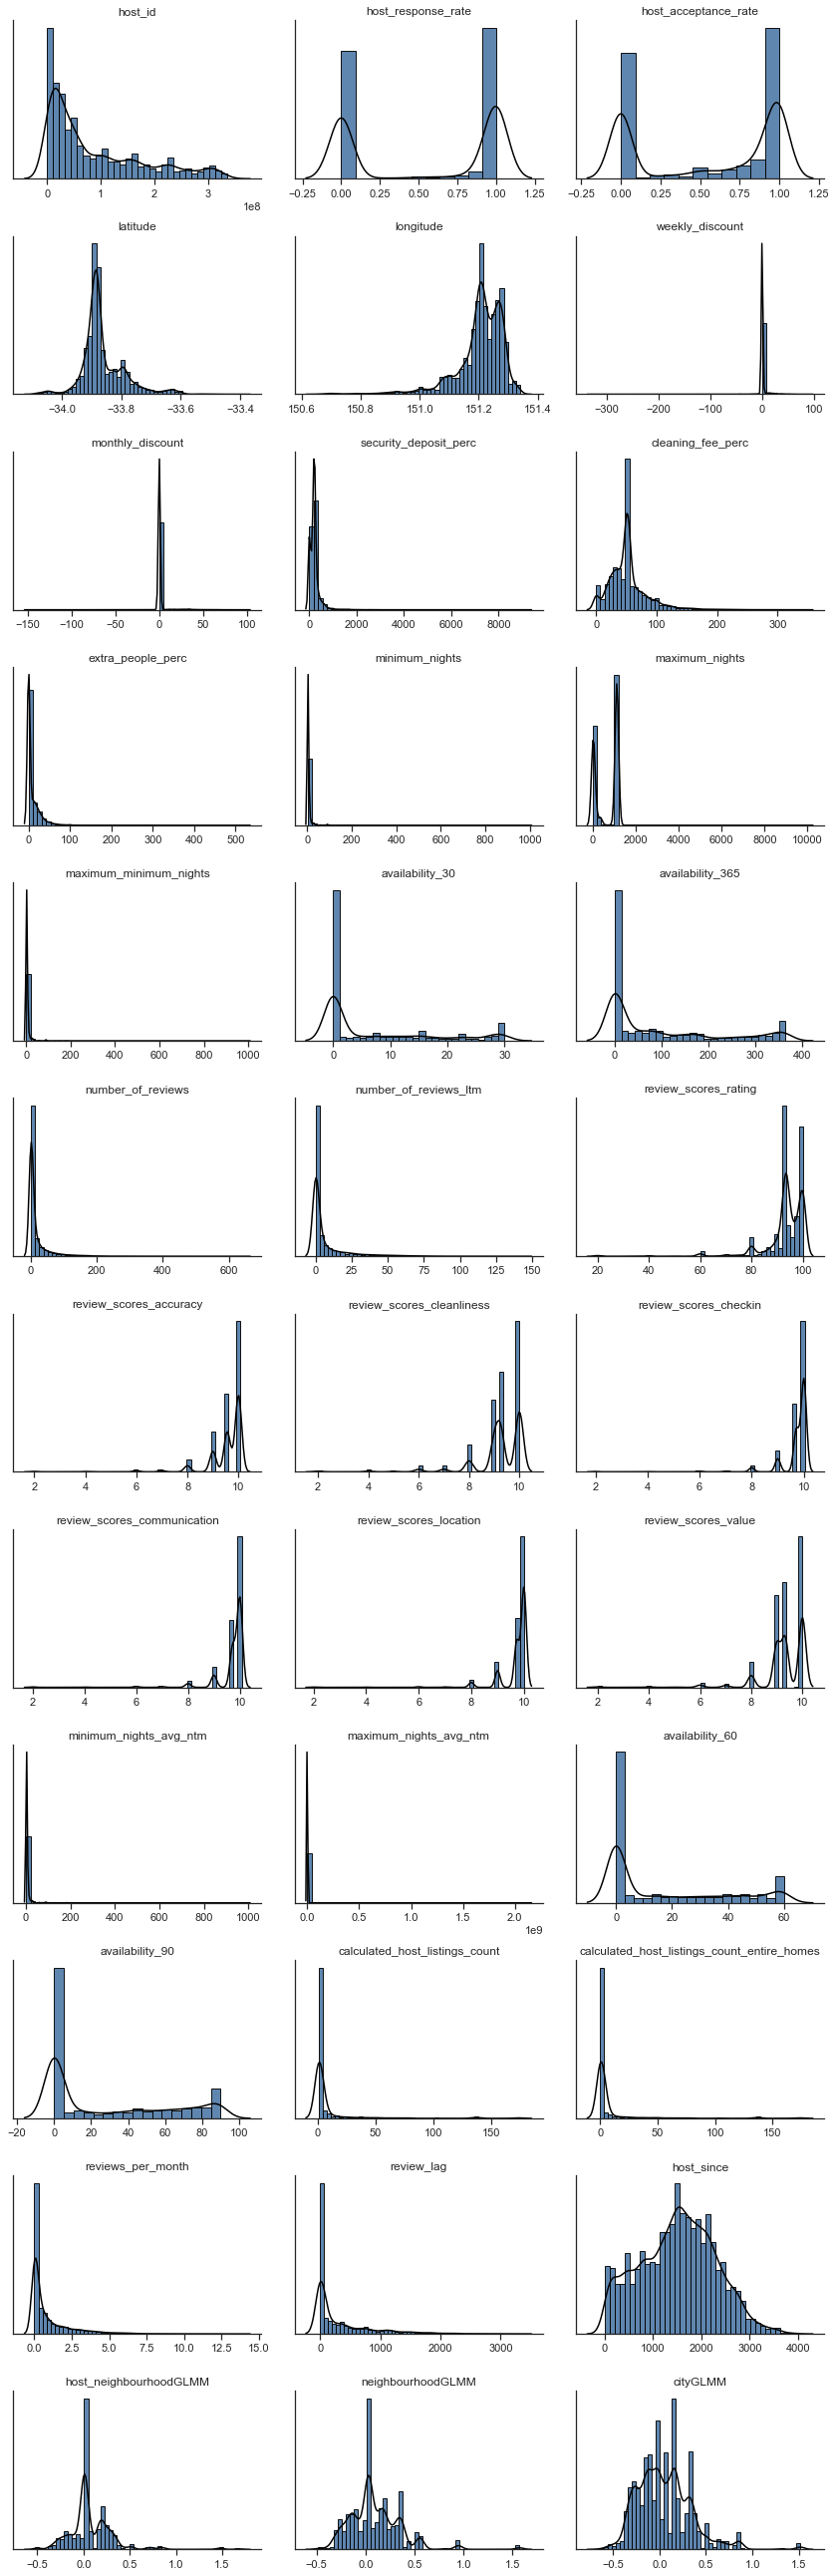

In [413]:
from statlearning import plot_dists
# EDA
plot_dists(train_fe[continuous])
plt.savefig('Continuous.png')
plt.show()

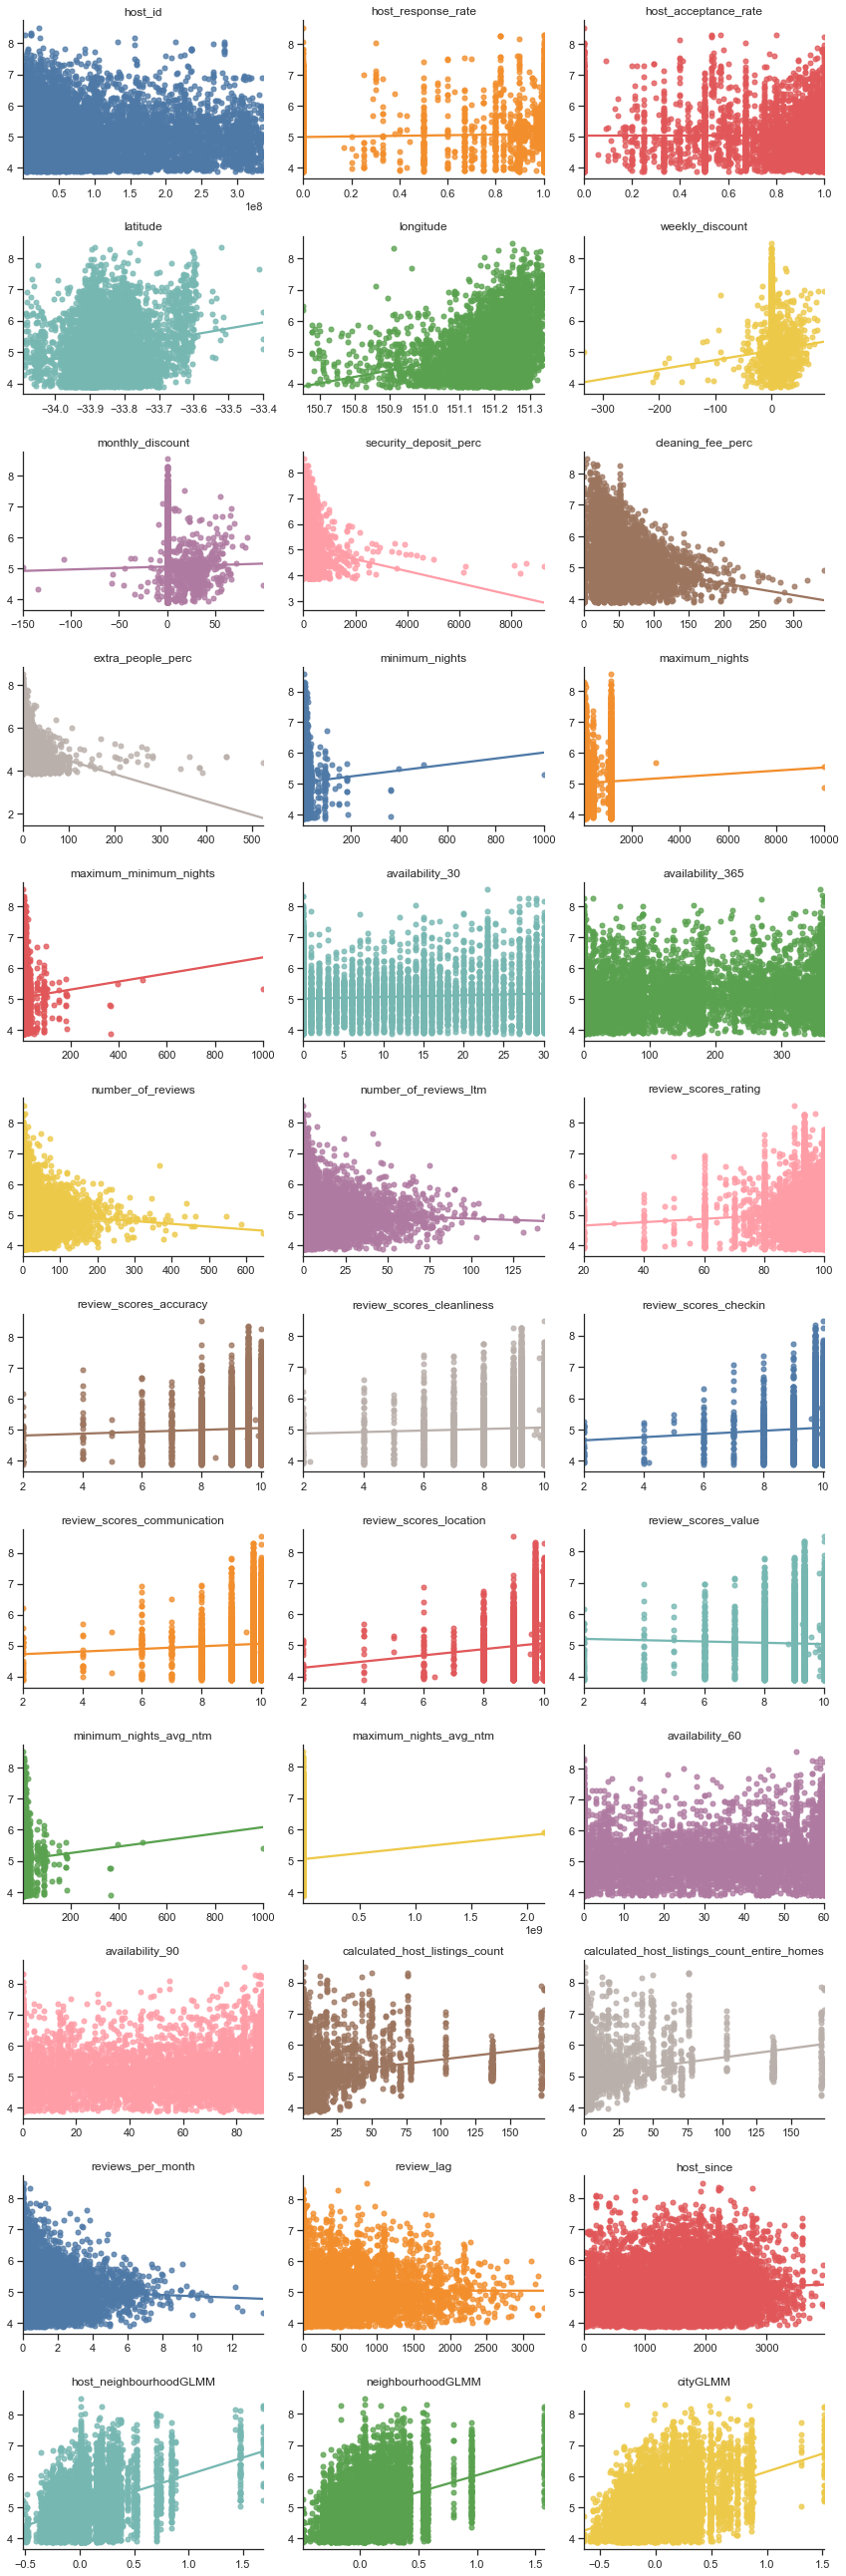

In [414]:
from statlearning import plot_regressions
# EDA 
reg_continuous = continuous.copy()
plot_regressions(train_fe[reg_continuous], train_fe['price'])
plt.savefig("Continuous vs price.png")
plt.show()

#### 3.2.3.2 Outliers

In [415]:
# outliers-->median。
train_fe['maximum_nights_avg_ntm'].value_counts().sort_index().round(3)

1.000               13
2.000               26
3.000               45
4.000               43
4.600                1
5.000               72
6.000               34
7.000              219
8.000               52
9.000               40
10.000             171
11.000              27
12.000              53
13.000              38
14.000             380
15.000              89
16.000              43
17.000              26
18.000              44
19.000              15
20.000             119
21.000             263
22.000              29
23.000              21
24.000              15
25.000              42
26.000              14
27.000               6
27.200               1
27.300               1
27.400               1
28.000             179
29.000              20
29.400               2
29.500               1
30.000             469
30.100               3
31.000              96
32.000              20
33.000               5
34.000               2
35.000              45
36.000               2
37.000     

In [416]:
# handle with the outliers.
# after the review of data, set a proper threshold, e.g in the previous, 9999 and 10000 and 2147483647 are obvious outliers so, we set teh 

# 'maximum_nights' -->2000
train_fe['maximum_nights'] = train_fe['maximum_nights'].mask(train_fe['maximum_nights']>2000, 
                                                                                 train_fe['maximum_nights'].median())
test_fe['maximum_nights'] = test_fe['maximum_nights'].mask(test_fe['maximum_nights']>2000, 
                                                                             test_fe['maximum_nights'].median())

# 'maximum_minimum_night' --> 200
train_fe['maximum_minimum_nights'] = train_fe['maximum_minimum_nights'].mask(train_fe['maximum_minimum_nights']>200, 
                                                                             train_fe['maximum_minimum_nights'].median())
test_fe['maximum_minimum_nights'] = test_fe['maximum_minimum_nights'].mask(test_fe['maximum_minimum_nights']>200, 
                                                                             test_fe['maximum_minimum_nights'].median())

# 'minimum_nights' -->400
train_fe['minimum_nights'] = train_fe['minimum_nights'].mask(train_fe['minimum_nights']>400, 
                                                                             train_fe['minimum_nights'].median())
test_fe['minimum_nights'] = test_fe['minimum_nights'].mask(test_fe['minimum_nights']>400, 
                                                                             test_fe['minimum_nights'].median())

# 'minimum_nights_avg_ntm' -->200
train_fe['minimum_nights_avg_ntm'] = train_fe['minimum_nights_avg_ntm'].mask(train_fe['minimum_nights_avg_ntm']>200, 
                                                                             train_fe['minimum_nights_avg_ntm'].median())
test_fe['minimum_nights_avg_ntm'] = test_fe['minimum_nights_avg_ntm'].mask(test_fe['minimum_nights_avg_ntm']>200, 
                                                                             test_fe['minimum_nights_avg_ntm'].median())
# 'maximum_nights_avg_ntm' -->1500
train_fe['maximum_nights_avg_ntm'] = train_fe['maximum_nights_avg_ntm'].mask(train_fe['maximum_nights_avg_ntm']>1500, 
                                                                             train_fe['maximum_nights_avg_ntm'].median())
test_fe['maximum_nights_avg_ntm'] = test_fe['maximum_nights_avg_ntm'].mask(test_fe['maximum_nights_avg_ntm']>1500, 
                                                                             test_fe['maximum_nights_avg_ntm'].median())

In [417]:
train_fe['maximum_minimum_nights'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,
        28,  29,  30,  31,  32,  35,  37,  40,  47,  48,  49,  50,  56,
        58,  60,  61,  70,  75,  80,  83,  87,  89,  90,  91,  95,  99,
       100, 120, 132, 150, 180, 182, 183, 185], dtype=int64)

#### 3.2.3.3 Sknewness

In [418]:
descriptive_fe = train_fe.describe()
descriptive_fe.loc['skew',:] = train_fe.skew()
descriptive_fe.loc['kurtosis',:] = train_fe.kurt()
descriptive_fe[continuous].round(3)

host_id  host_response_rate  host_acceptance_rate  latitude  \
count        10635.000           10635.000             10635.000 10635.000   
mean      87940115.075               0.551                 0.560   -33.863   
std       89866416.825               0.487                 0.451     0.073   
min          15030.000               0.000                 0.000   -34.093   
25%       16265699.000               0.000                 0.000   -33.897   
50%       49950022.000               0.970                 0.800   -33.881   
75%      141958044.500               1.000                 1.000   -33.832   
max      335925029.000               1.000                 1.000   -33.400   
skew             1.094              -0.220                -0.317     1.146   
kurtosis         0.079              -1.920                -1.762     3.171   

          longitude  weekly_discount  monthly_discount  security_deposit_perc  \
count     10635.000        10635.000         10635.000              10635.000   
mean        151.204            0.756             1.146                216.140   
std           0.084            9.854             7.305                304.760   
min         150.654         -333.333          -150.000                  0.000   
25%         151.181            0.000             0.000                100.000   
50%         151.214            0.000             0.000                216.140   
75%         151.261            0.000             0.000                216.140   
max         151.340           93.571            99.961               9250.000   
skew         -2.154           -7.910             3.343                 12.541   
kurtosis      7.488          239.284            69.351                273.180   

          cleaning_fee_perc  extra_people_perc  minimum_nights  \
count             10635.000          10635.000       10635.000   
mean                 51.774              8.939           4.740   
std                  31.443             21.453          12.650   
min                   0.000              0.000           1.000   
25%                  33.000              0.000           1.000   
50%                  51.774              0.000           2.000   
75%                  60.000             12.000           5.000   
max                 344.000            525.000         395.000   
skew                  1.720              8.483          14.584   
kurtosis              6.843            128.840         322.722   

          maximum_nights  maximum_minimum_nights  availability_30  \
count          10635.000               10635.000        10635.000   
mean             682.049                   5.016            7.061   
std              527.465                  10.782           10.124   
min                1.000                   1.000            0.000   
25%               30.000                   2.000            0.000   
50%             1125.000                   3.000            0.000   
75%             1125.000                   5.000           13.000   
max             1125.000                 185.000           30.000   
skew              -0.375                   9.026            1.150   
kurtosis          -1.826                 106.271           -0.174   

          availability_365  number_of_reviews  number_of_reviews_ltm  \
count            10635.000          10635.000              10635.000   
mean                93.840             17.369                  6.790   
std                124.108             39.821                 14.096   
min                  0.000              0.000                  0.000   
25%                  0.000              1.000                  0.000   
50%                 19.000              3.000                  1.000   
75%                165.000             14.000                  6.000   
max                365.000            646.000                143.000   
skew                 1.092              4.953                  3.219   
kurtosis            -0.286             37.070            

In [419]:
descriptive_fe[continuous].loc['skew',:].round(3)

host_id                                        1.094
host_response_rate                            -0.220
host_acceptance_rate                          -0.317
latitude                                       1.146
longitude                                     -2.154
weekly_discount                               -7.910
monthly_discount                               3.343
security_deposit_perc                         12.541
cleaning_fee_perc                              1.720
extra_people_perc                              8.483
minimum_nights                                14.584
maximum_nights                                -0.375
maximum_minimum_nights                         9.026
availability_30                                1.150
availability_365                               1.092
number_of_reviews                              4.953
number_of_reviews_ltm                          3.219
review_scores_rating                          -3.931
review_scores_accuracy                        

In [420]:
# find skewness > 1 
skewed_con = descriptive_fe[continuous].loc['skew',:][(abs(descriptive_fe[continuous].loc['skew',:])>1)].index

# Due to the particularity of id and latitude and longitude, drop it here.
skewed_con = skewed_con.drop(['latitude', 'longitude','host_id'])
skewed_con

Index(['weekly_discount', 'monthly_discount', 'security_deposit_perc',
       'cleaning_fee_perc', 'extra_people_perc', 'minimum_nights',
       'maximum_minimum_nights', 'availability_30', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'minimum_nights_avg_ntm', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes', 'reviews_per_month',
       'review_lag', 'host_neighbourhoodGLMM', 'neighbourhoodGLMM',
       'cityGLMM'],
      dtype='object')

In [421]:
# log transformation
from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method = 'yeo-johnson') # YJ is the default, this function also does Box-Cox
train_fe[skewed_con]  = yj.fit_transform(train_fe.loc[:, skewed_con])
# test 
test_fe[skewed_con] = yj.transform(test_fe.loc[:, skewed_con])

In [422]:
# skewness
descriptive_fe = train_fe.describe()
descriptive_fe.loc['skew',:] = train_fe.skew()
descriptive_fe.loc['kurtosis',:] = train_fe.kurt()
descriptive_fe[continuous].round(3)

host_id  host_response_rate  host_acceptance_rate  latitude  \
count        10635.000           10635.000             10635.000 10635.000   
mean      87940115.075               0.551                 0.560   -33.863   
std       89866416.825               0.487                 0.451     0.073   
min          15030.000               0.000                 0.000   -34.093   
25%       16265699.000               0.000                 0.000   -33.897   
50%       49950022.000               0.970                 0.800   -33.881   
75%      141958044.500               1.000                 1.000   -33.832   
max      335925029.000               1.000                 1.000   -33.400   
skew             1.094              -0.220                -0.317     1.146   
kurtosis         0.079              -1.920                -1.762     3.171   

          longitude  weekly_discount  monthly_discount  security_deposit_perc  \
count     10635.000        10635.000         10635.000              10635.000   
mean        151.204           -0.000            -0.000                  0.000   
std           0.084            1.000             1.000                  1.000   
min         150.654          -28.103           -38.614                 -1.716   
25%         151.181           -0.101            -0.122                 -0.243   
50%         151.214           -0.101            -0.122                  0.349   
75%         151.261           -0.101            -0.122                  0.349   
max         151.340           11.175            10.170                  7.590   
skew         -2.154           -2.933            -8.963                 -0.118   
kurtosis      7.488          131.849           407.974                  2.019   

          cleaning_fee_perc  extra_people_perc  minimum_nights  \
count             10635.000          10635.000       10635.000   
mean                  0.000             -0.000           0.000   
std                   1.000              1.000           1.000   
min                  -2.461             -0.731          -1.285   
25%                  -0.517             -0.731          -1.285   
50%                   0.132             -0.731          -0.241   
75%                   0.384              1.278           0.920   
max                   5.809              1.700           2.436   
skew                  0.143              0.659           0.181   
kurtosis              1.937             -1.527          -0.949   

          maximum_nights  maximum_minimum_nights  availability_30  \
count          10635.000               10635.000        10635.000   
mean             682.049                  -0.000           -0.000   
std              527.465                   1.000            1.000   
min                1.000                  -1.391           -0.854   
25%               30.000                  -0.392           -0.854   
50%             1125.000                   0.164           -0.854   
75%             1125.000                   0.782            1.160   
max             1125.000                   2.509            1.430   
skew              -0.375                   0.132            0.394   
kurtosis          -1.826                  -0.825           -1.738   

          availability_365  number_of_reviews  number_of_reviews_ltm  \
count            10635.000          10635.000              10635.000   
mean                -0.000             -0.000                 -0.000   
std                  1.000              1.000                  1.000   
min                 -1.059             -1.301                 -0.929   
25%                 -1.059             -0.597                 -0.929   
50%                  0.177             -0.010                  0.005   
75%                  1.007              0.851                  1.002   
max                  1.308              2.153                  1.809   
skew                 0.029              0.161                  0.406   
kurtosis            -1.803             -1.188            

### 3.2.4 Low cardinality predictors

#### 3.2.4.1 EDA

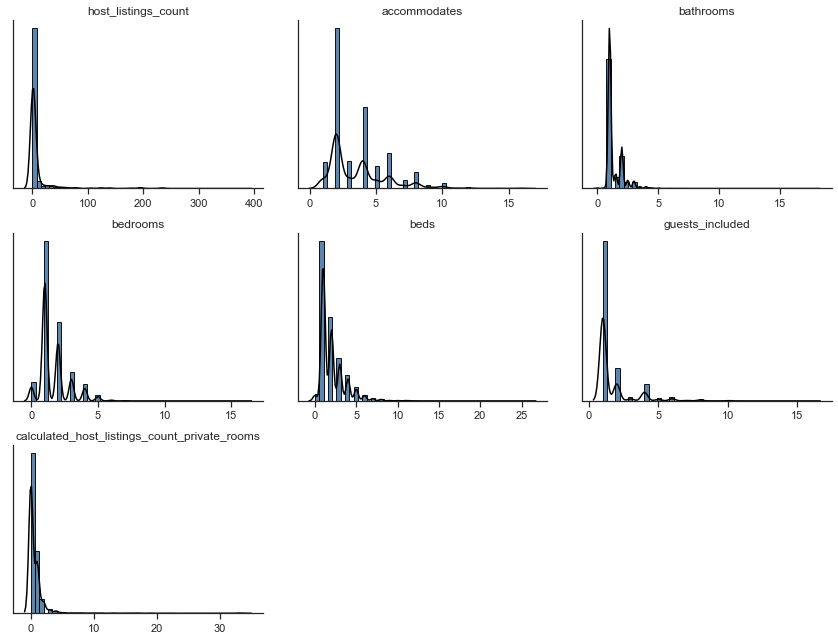

In [423]:
plot_dists(train_fe[low_card])
plt.savefig("Low_card.png")
plt.show()

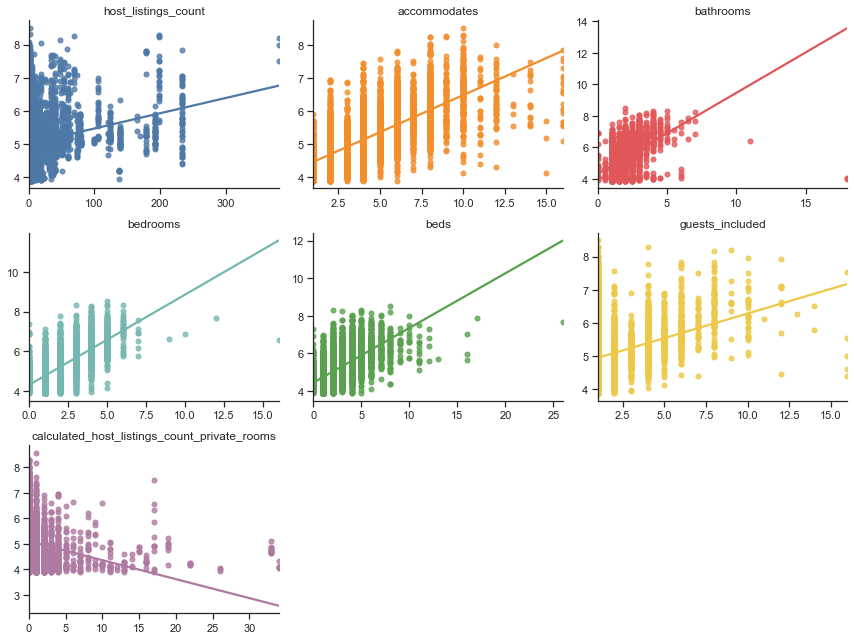

In [424]:
plot_regressions(train_fe[low_card], train_fe['price'])
plt.savefig('Low_card vs price.png')
plt.show()

#### 3.2.4.2 Outliers

According to the above EDA, ["host_listings_count",'bathrooms','bedrooms','beds'] seems to have outliers. After analysis, it is found that outliers are not suitable to be removed and kept temporarily.

In [425]:
train_fe[low_card[3]].value_counts().sort_index().round(3)

0.000      641
1.000     5480
2.000     2689
3.000     1004
4.000      582
5.000      196
6.000       32
7.000        7
9.000        1
10.000       1
12.000       1
16.000       1
Name: bedrooms, dtype: int64

In [426]:
# 'beds' -->20
train_fe['beds'] = train_fe['beds'].mask(train_fe['beds']>20,train_fe['beds'].median())
test_fe['beds'] = test_fe['beds'].mask(test_fe['beds']>20, test_fe['beds'].median())

In [427]:
# host_listings_count >300
train_fe['host_listings_count'] = train_fe['host_listings_count'].mask(train_fe['host_listings_count']>300,train_fe['host_listings_count'].median())
test_fe['host_listings_count'] = test_fe['host_listings_count'].mask(test_fe['host_listings_count']>300, test_fe['host_listings_count'].median())

In [428]:
# bathrooms >10
train_fe['bathrooms'] = train_fe['bathrooms'].mask(train_fe['bathrooms']>10,train_fe['bathrooms'].median())
test_fe['bathrooms'] = test_fe['bathrooms'].mask(test_fe['bathrooms']>10, test_fe['bathrooms'].median())

In [429]:
# bedrooms >10
train_fe['bedrooms'] = train_fe['bedrooms'].mask(train_fe['bedrooms']>10,train_fe['bedrooms'].median())
test_fe['bedrooms'] = test_fe['bedrooms'].mask(test_fe['bedrooms']>10, test_fe['bedrooms'].median())

#### 3.2.4.3 Skewness

In [430]:
descriptive_fe[low_card].round(3)

host_listings_count  accommodates  bathrooms  bedrooms      beds  \
count               10635.000     10635.000  10635.000 10635.000 10635.000   
mean                    9.384         3.614      1.383     1.642     2.072   
std                    29.820         2.259      0.722     1.100     1.544   
min                     0.000         1.000      0.000     0.000     0.000   
25%                     1.000         2.000      1.000     1.000     1.000   
50%                     1.000         3.000      1.000     1.000     2.000   
75%                     3.000         4.000      2.000     2.000     3.000   
max                   381.000        16.000     18.000    16.000    26.000   
skew                    5.464         1.545      4.370     1.565     2.336   
kurtosis               34.409         3.167     60.639     5.412    12.070   

          guests_included  calculated_host_listings_count_private_rooms  
count           10635.000                                     10635.000  
mean                1.675                                         0.705  
std                 1.468                                         2.149  
min                 1.000                                         0.000  
25%                 1.000                                         0.000  
50%                 1.000                                         0.000  
75%                 2.000                                         1.000  
max                16.000                                        34.000  
skew                3.209                                         9.196  
kurtosis           13.911                                       112.112

In [431]:
skewed_low_card = descriptive_fe[low_card].loc['skew',:][(abs(descriptive_fe[low_card].loc['skew',:])>1)].index

yj = PowerTransformer(method = 'yeo-johnson') # YJ is the default, this function also does Box-Cox
train_fe[skewed_low_card]  = yj.fit_transform(train_fe.loc[:, skewed_low_card])
# test 
test_fe[skewed_low_card] = yj.transform(test_fe.loc[:, skewed_low_card])

In [432]:
descriptive_fe = train_fe.describe()
descriptive_fe[low_card].round(3)

host_listings_count  accommodates  bathrooms  bedrooms      beds  \
count            10635.000     10635.000  10635.000 10635.000 10635.000   
mean                -0.000        -0.000     -0.000     0.000     0.000   
std                  1.000         1.000      1.000     1.000     1.000   
min                 -2.113        -1.973     -8.507    -2.359    -3.173   
25%                 -0.438        -0.734     -0.581    -0.513    -0.782   
50%                 -0.438         0.007     -0.581    -0.513     0.281   
75%                  0.584         0.514      1.236     0.535     0.915   
max                  2.098         2.492      2.774     3.736     3.094   

       guests_included  calculated_host_listings_count_private_rooms  
count        10635.000                                     10635.000  
mean             0.000                                        -0.000  
std              1.000                                         1.000  
min             -0.627                                        -0.736  
25%             -0.627                                        -0.736  
50%             -0.627                                        -0.736  
75%              1.351                                         1.204  
max              1.868                                         1.855

至此，所有的数据做完了feature engineering。下面就是再次进行EDA和数据分析，例如相关性等。

### 3.2.5 Data Combination

In [433]:
# combine the string with continuous( we have transfered the string into int)
continuous = continuous+string

In [434]:
continuous

['host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'latitude',
 'longitude',
 'weekly_discount',
 'monthly_discount',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'reviews_per_month',
 'review_lag',
 'host_since',
 'host_neighbourhoodGLMM',
 'neighbourhoodGLMM',
 'cityGLMM',
 'name',
 'space',
 'description',
 'transit',
 'access',
 'host_verifications',
 'amenities']

# 4. EDA

## 4.1 Bivariate EDA

### 4.1.1 Categorical variables EDA

In [435]:
EDA_biv_ca = train_dm.copy()

In [436]:
EDA_biv_ca['price'] = train_fe['price']

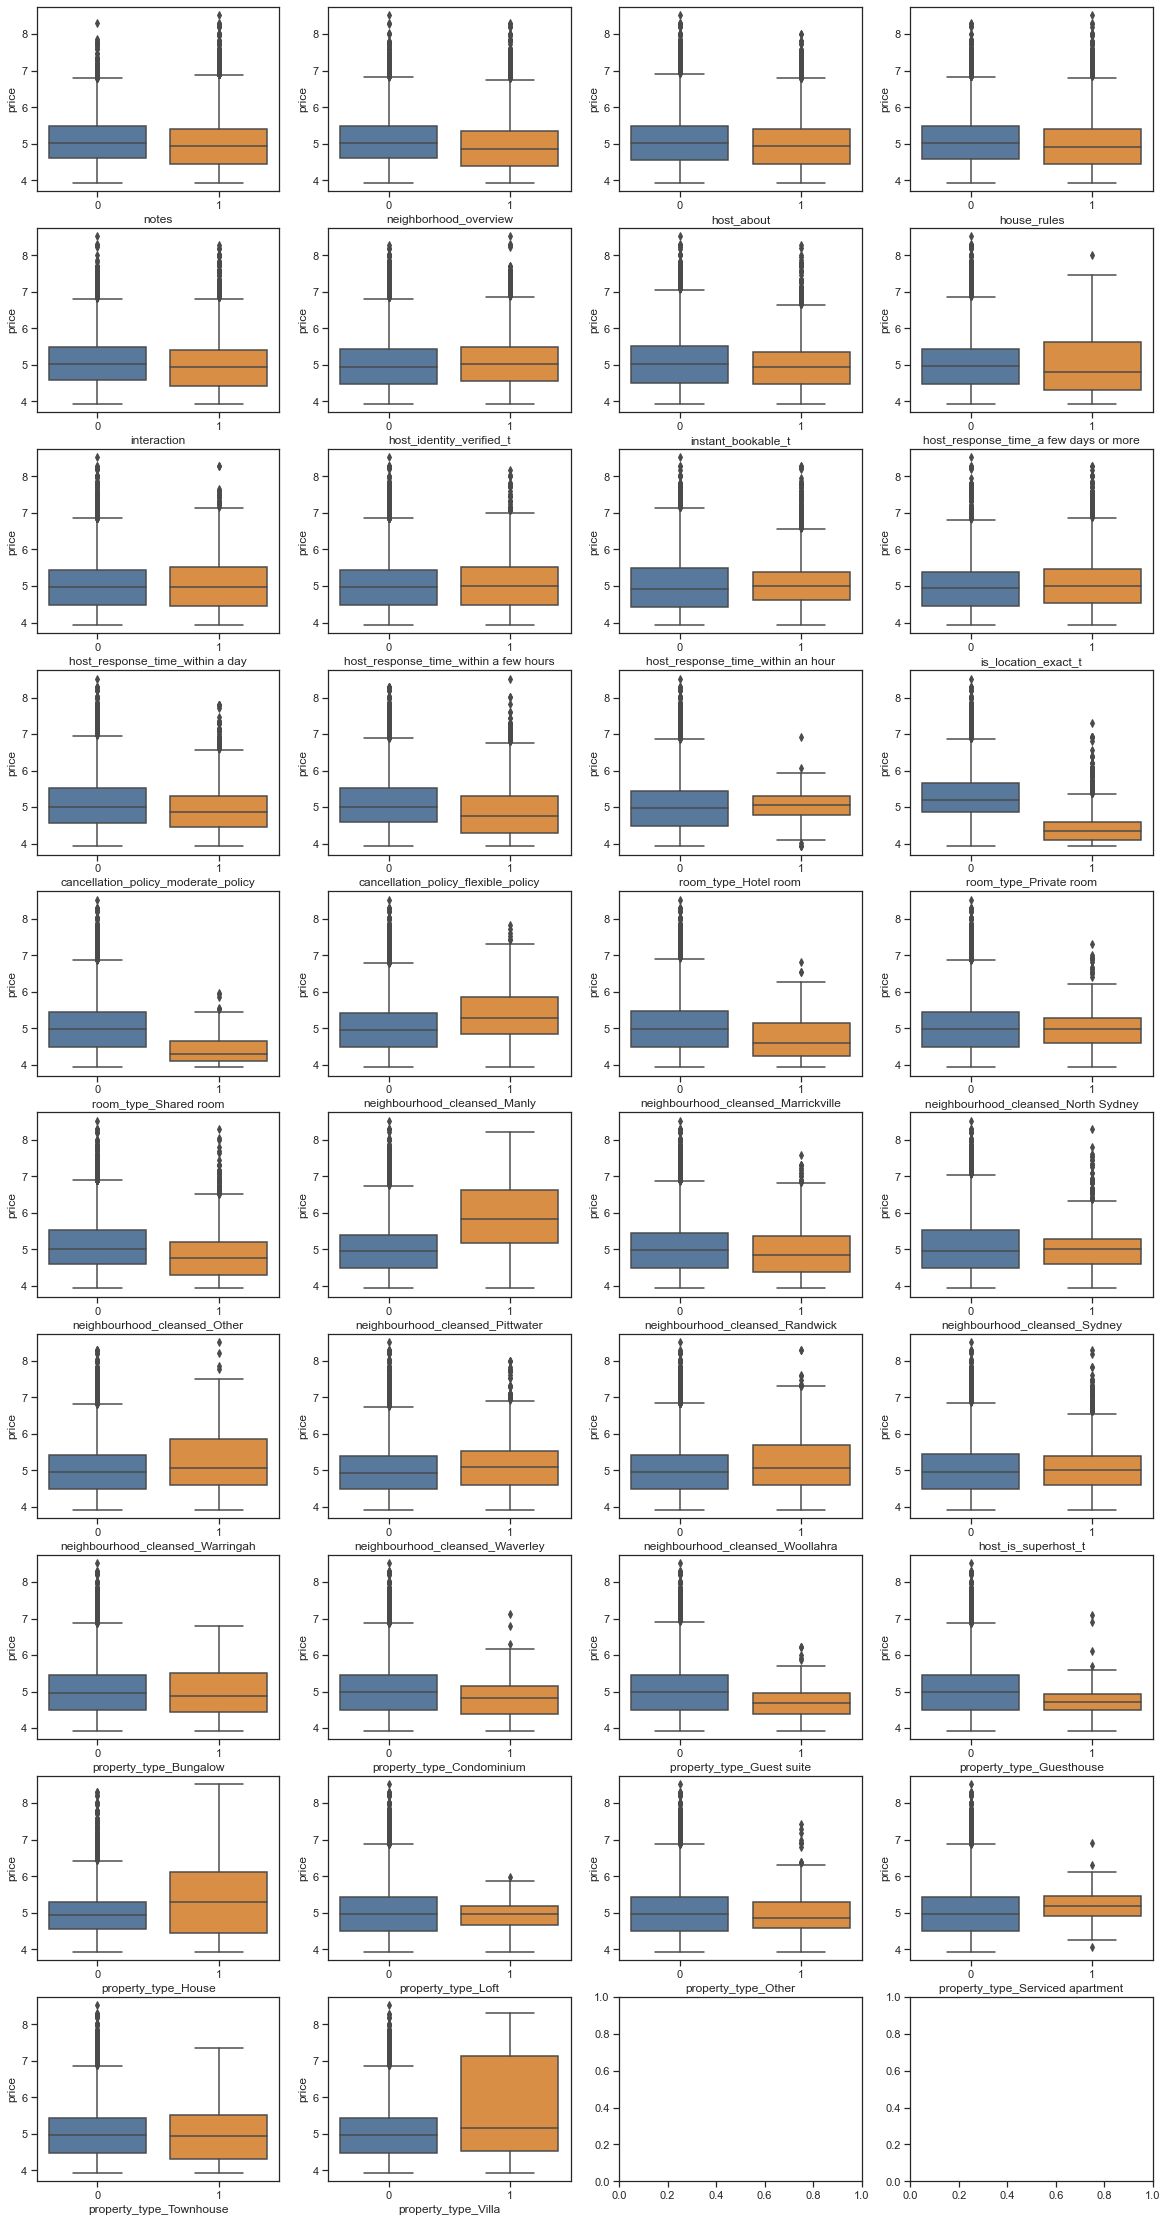

In [437]:
fig, axes = plt.subplots(10,4, figsize = (20, 40))
for a in range(10):
    for i,t in enumerate(train_dm.columns[4*a:4*(a+1)]):
        sns.boxplot(y = 'price', x = t, data = EDA_biv_ca, orient = 'v', ax = axes[a,i % 4])
plt.savefig('Categorical Variables EDA.png')

### 4.1.2 Continuous variables EDA

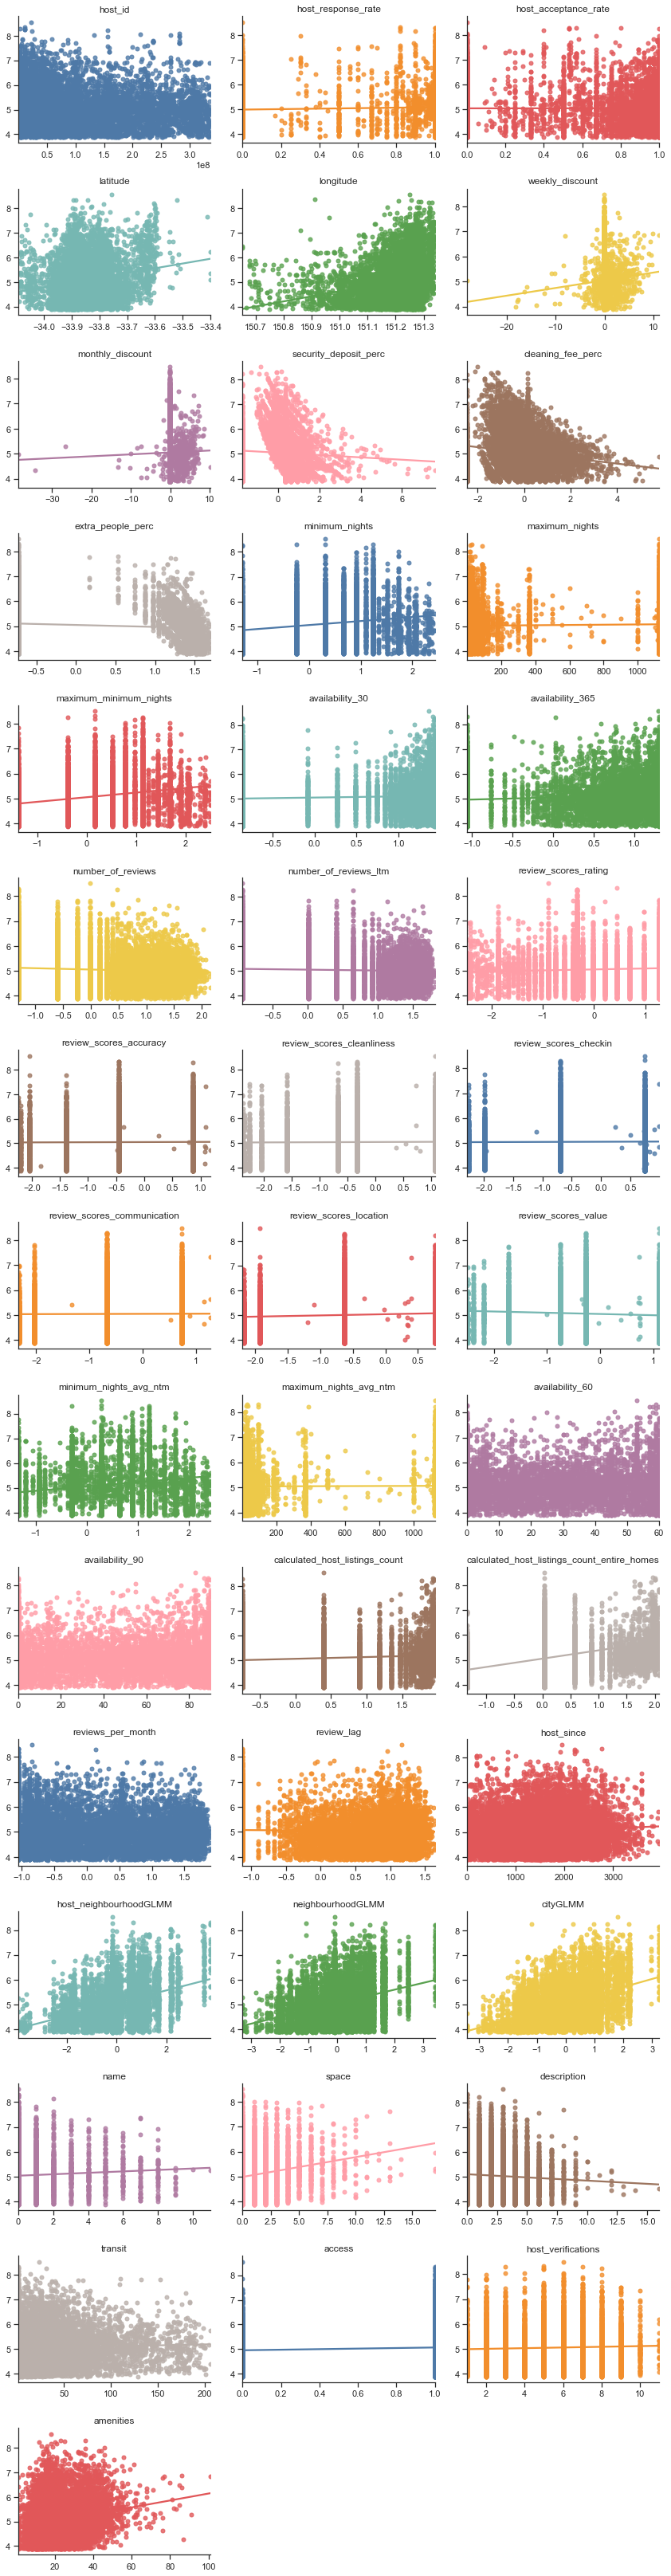

In [438]:
plot_regressions(train_fe[continuous], train_fe['price'])
plt.savefig('Cotninous Variables EDA.png')
plt.show()

### 4.1.3 Low_card(discrete variables) EDA

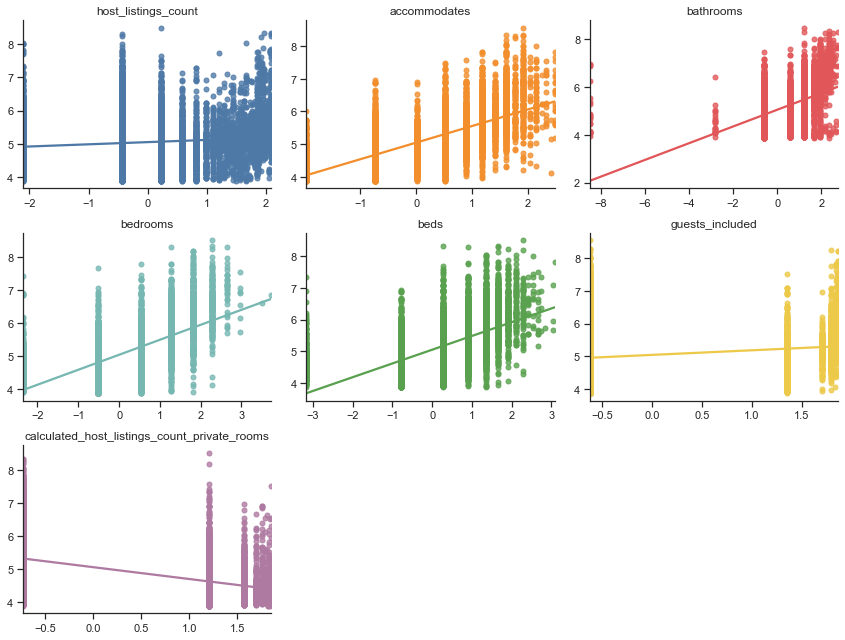

In [439]:
plot_regressions(train_fe[low_card], train_fe['price'])
plt.savefig('Low_Cardinality EDA.png')
plt.show()

## 4.2 Multivariate EDA

### 4.2.1 Correlation analysis

In [440]:
corrmat = train_fe.corr()['price'].sort_values( ascending = True)
corrmat.round(3)

calculated_host_listings_count_private_rooms   -0.490
cleaning_fee_perc                              -0.151
extra_people_perc                              -0.106
neighborhood_overview                          -0.077
number_of_reviews                              -0.073
review_scores_value                            -0.068
security_deposit_perc                          -0.064
host_id                                        -0.063
description                                    -0.062
house_rules                                    -0.060
host_about                                     -0.057
reviews_per_month                              -0.057
interaction                                    -0.052
notes                                          -0.051
number_of_reviews_ltm                          -0.047
review_lag                                     -0.033
host_acceptance_rate                            0.005
review_scores_communication                     0.007
review_scores_accuracy      

### 4.2.2 Prescreening 

In [441]:
# Select the variable whose correlation with price is stronger than 0.08, 0.08 is adjustable.
train_related = train_fe[corrmat.loc[(corrmat >0.08 )| (corrmat < -0.08)].index].copy()

# Pay attention to delete price, because there is no "price" in test
test_related = test_fe[list(set(train_related.columns)-set(['price']))].copy()

In [442]:
continuous_related = []
categorical_related = []
low_card_related = []

# update vatiable list
for i in test_related.columns:
    if i in continuous:
        continuous_related.append(i)
    elif i in categorical:
        categorical_related.append(i)
    else:
        low_card_related.append(i)

In [443]:
# response is not added here.
len(categorical_related+ continuous_related + low_card_related)

23

In [444]:
test_related.shape

(24818, 23)

In [445]:
train_related.shape

(10635, 24)

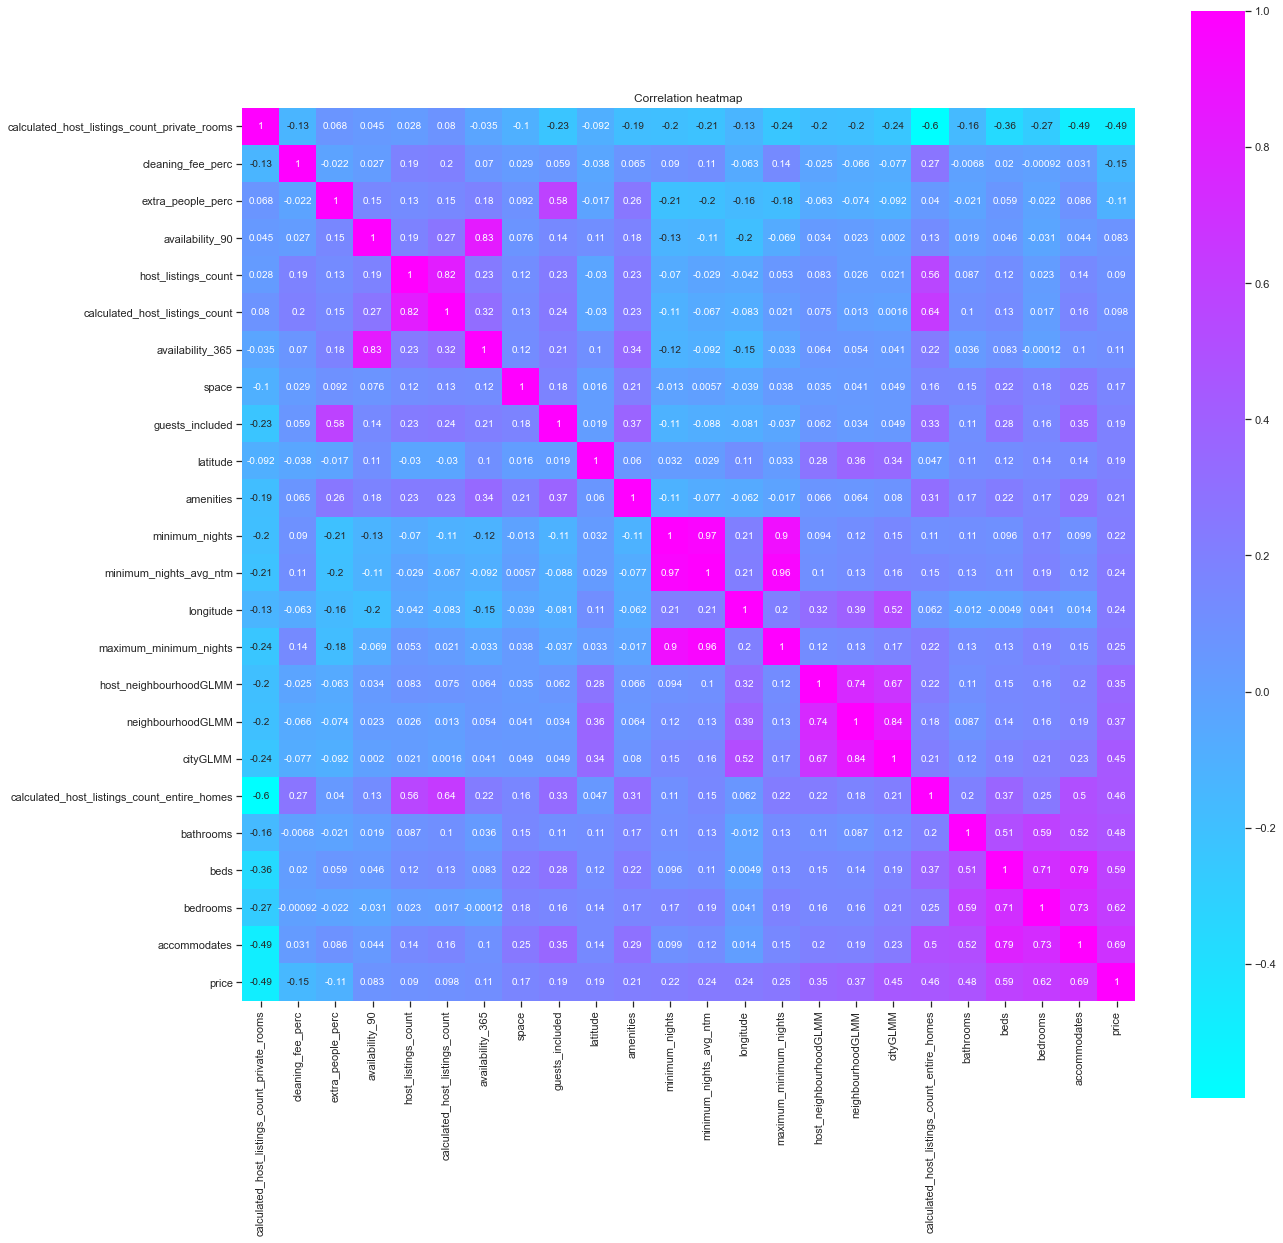

In [446]:
plt.subplots(figsize = (20,20))
# EDA
sns.heatmap(train_related.corr(), square = True, annot = True, cmap = 'cool')
plt.title('Correlation heatmap')
plt.savefig('Correlation Heatmap.png')
plt.show()

### 4.3.3 Drop highly correlated variables

In [447]:
# maximum_minimum_hights vs minumum_nights 0.9
# maximum_minimum_hights vs minimum_nights_avg_ntm  0.96
# minimum_nights vs minimum_nights_avg_ntm  0.97
# drop the minimum_nights and minimum_nights_avg_ntm because they has a lower correlation with price than maximum_minimum_hights

train_related= train_related.drop(['minimum_nights','minimum_nights_avg_ntm'], axis = 1)

update the list

In [448]:
# locate the correlated varibales
'minimum_nights_avg_ntm'and 'minimum_nights' in continuous_related

True

In [449]:
# update the list
continuous_related.remove('minimum_nights')
continuous_related.remove('minimum_nights_avg_ntm')

## 4.3 Special EDA

### 4.3.1 Map

In [450]:
process_train[['longitude','latitude']].min().round(3)

longitude   150.654
latitude    -34.093
dtype: float64

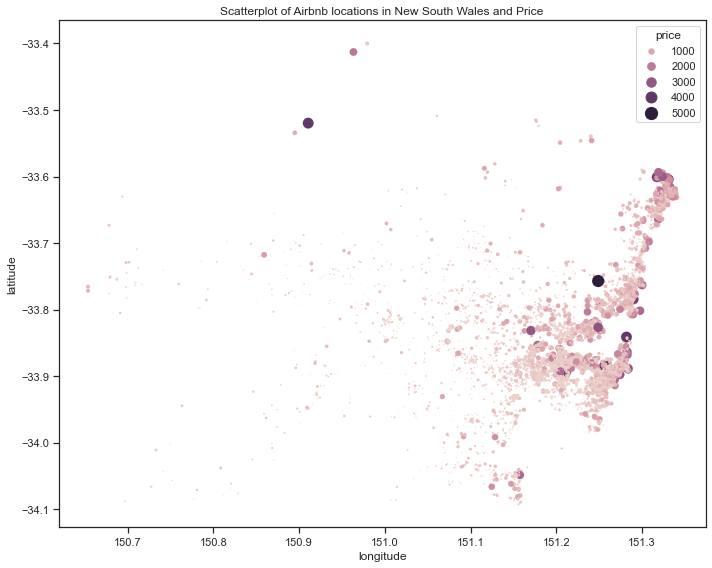

In [451]:
# EDA
fig,ax = plt.subplots(figsize = (10,8))
sns.scatterplot(data=process_train, x="longitude", y="latitude", hue="price", size="price", sizes=(0, 150))
plt.title('Scatterplot of Airbnb locations in New South Wales and Price')
plt.tight_layout()
plt.savefig('Scatterplot Map.png')
plt.show()

### 4.3.2 Interaction effects

In [452]:
# correlation cross table
train_related.corr().round(3)

calculated_host_listings_count_private_rooms  \
calculated_host_listings_count_private_rooms                                         1.000   
cleaning_fee_perc                                                                   -0.134   
extra_people_perc                                                                    0.068   
availability_90                                                                      0.045   
host_listings_count                                                                  0.028   
calculated_host_listings_count                                                       0.080   
availability_365                                                                    -0.035   
space                                                                               -0.103   
guests_included                                                                     -0.233   
latitude                                                                            -0.092   
amenities                                                                           -0.189   
longitude                                                                           -0.134   
maximum_minimum_nights                                                              -0.237   
host_neighbourhoodGLMM                                                              -0.197   
neighbourhoodGLMM                                                                   -0.198   
cityGLMM                                                                            -0.238   
calculated_host_listings_count_entire_homes                                         -0.597   
bathrooms                                                                           -0.161   
beds                                                                                -0.363   
bedrooms                                                                            -0.274   
accommodates                                                                        -0.491   
price                                                                               -0.490   

                                              cleaning_fee_perc  \
calculated_host_listings_count_private_rooms             -0.134   
cleaning_fee_perc                                         1.000   
extra_people_perc                                        -0.022   
availability_90                                           0.027   
host_listings_count                                       0.189   
calculated_host_listings_count                            0.196   
availability_365                                          0.070   
space                                                     0.029   
guests_included                                           0.059   
latitude                                                 -0.038   
amenities                                                 0.065   
longitude                                                -0.063   
maximum_minimum_nights                                    0.136   
host_neighbourhoodGLMM                                   -0.025   
neighbourhoodGLMM                                        -0.066   
cityGLMM                                                 -0.077   
calculated_host_listings_count_entire_homes               0.266   
bathrooms                                                -0.007   
beds                                                      0.020   
bedrooms                                                 -0.001   
accommodates                                              0.031   
price                                                    -0.151   

                                              extra_people_perc  \
calculated_host_listings_count_private_rooms              0.068   
cleaning_fee_perc                                        -0.022   
extra_people_perc                                         1.000   
availability_90                                           0.153   
host_l

# 5. Data Transformation

## 5.1 Negative data

In [453]:
train_related['latitude'].head().round(3)

0   -34.029
1   -33.915
2   -33.888
3   -33.800
4   -33.757
Name: latitude, dtype: float64

In [454]:
train_related['latitude'] = -train_related['latitude']
test_related['latitude'] = -test_related['latitude']

## 5.2 Data scale transformation（max_min scaling)

In [455]:
# data max_min scaling
for i in continuous_related + low_card_related:
    train_related[i] = (train_related[i] - train_related[i].min())/(train_related[i].max() - train_related[i].min())
for i in continuous_related + low_card_related:
    test_related[i] = (test_related[i] - test_related[i].min())/(test_related[i].max() - test_related[i].min())

In [456]:
train_related.head(20).round(3)

calculated_host_listings_count_private_rooms  cleaning_fee_perc  \
0                                          0.960              0.000   
1                                          0.749              0.314   
2                                          0.000              0.479   
3                                          0.000              0.175   
4                                          0.749              0.279   
5                                          0.000              0.082   
6                                          0.000              0.322   
7                                          0.000              0.244   
8                                          0.000              0.221   
9                                          0.000              0.351   
10                                         0.000              0.314   
11                                         0.000              0.405   
12                                         0.000              0.446   
13                                         0.000              0.529   
14                                         0.749              0.314   
15                                         0.000              0.340   
16                                         0.000              0.262   
17                                         0.749              0.314   
18                                         0.000              0.322   
19                                         0.000              0.257   

    extra_people_perc  availability_90  host_listings_count  \
0               0.000            0.478                0.736   
1               0.000            0.000                0.398   
2               0.000            0.444                0.554   
3               0.804            0.000                0.398   
4               0.000            0.000                0.398   
5               0.000            0.589                0.554   
6               0.000            0.000                0.398   
7               0.000            0.622                0.398   
8               0.701            0.189                0.891   
9               0.775            0.078                0.398   
10              0.000            0.000                0.398   
11              0.000            0.067                0.554   
12              0.000            0.833                0.000   
13              0.000            0.822                0.398   
14              0.878            0.000                0.554   
15              0.000            0.000                0.000   
16              0.000            0.833                0.554   
17              0.000            0.000                0.398   
18              0.000            0.000                0.398   
19              0.000            0.367                0.398   

    calculated_host_listings_count  availability_365  space  guests_included  \
0                            0.712             0.654  0.000            0.000   
1                            0.000             0.000  0.000            0.000   
2                            0.000             0.643  0.059            0.000   
3                            0.000             0.000  0.059            0.793   
4                            0.000             0.000  0.000            0.000   
5                            0.000             0.975  0.118            0.972   
6                            0.000             0.449  0.118            0.972   
7                            0.000             0.928  0.059            0.000   
8                            0.775             0.522  0.059            0.972   
9                            0.000             0.366  0.059            0.972   
10                           0.000             0.000  0.000            0.000   
11                           0.423             0.747  0.294            0.000   
12                           0.000             0.745  0.000            0.000   
13                           0.000             0.993  0.000         

## 5.3 Data standardisation

In [457]:
# data standardisation
# reason: we found that some specail variables still have a skewed distribution, 
# so to make a better prediction, we decided a standardisation.
for i in continuous_related + low_card_related:
    train_related[i] = (train_related[i] - train_related[i].mean())/train_related[i].std()

for i in continuous_related + low_card_related:
    test_related[i] = (test_related[i] - test_related[i].mean())/test_related[i].std()

In [458]:
train_related.head().round(3)
# train_related.to_csv('data.csv')

calculated_host_listings_count_private_rooms  cleaning_fee_perc  \
0                                         1.752             -2.461   
1                                         1.204              0.132   
2                                        -0.736              1.497   
3                                        -0.736             -1.015   
4                                         1.204             -0.157   

   extra_people_perc  availability_90  host_listings_count  \
0             -0.731            0.428                0.986   
1             -0.731           -0.834               -0.438   
2             -0.731            0.340                0.220   
3              1.224           -0.834               -0.438   
4             -0.731           -0.834               -0.438   

   calculated_host_listings_count  availability_365  space  guests_included  \
0                           1.178             0.490 -0.497           -0.627   
1                          -0.741            -1.059 -0.497           -0.627   
2                          -0.741             0.462  0.148           -0.627   
3                          -0.741            -1.059  0.148            1.351   
4                          -0.741            -1.059 -0.497           -0.627   

   latitude  amenities  longitude  maximum_minimum_nights  \
0     2.284     -0.535     -1.215                  -1.391   
1     0.725     -0.807      0.389                   0.164   
2     0.355      1.459     -0.448                  -1.391   
3    -0.854      0.643      0.823                   0.782   
4    -1.449     -0.898      1.070                  -0.392   

   host_neighbourhoodGLMM  neighbourhoodGLMM  cityGLMM  \
0                  -0.165             -0.076    -0.085   
1                   0.620             -0.273    -0.219   
2                  -2.063             -1.656    -1.186   
3                   1.072              0.797     0.215   
4                  -0.165             -0.076    -0.380   

   calculated_host_listings_count_entire_homes  bathrooms   beds  bedrooms  \
0                                       -1.344     -0.581 -0.782    -0.513   
1                                       -1.344     -0.581  0.280    -0.513   
2                                        0.033     -0.581 -0.782    -0.513   
3                                        0.033     -0.581  0.280     0.535   
4                                       -1.344     -0.581 -0.782    -0.513   

   accommodates  price  
0        -0.734  4.304  
1        -0.734  4.143  
2        -0.734  5.170  
3         0.514  5.273  
4        -0.734  3.932

# 6. Model Fitting and Selection

## 6.1 Data preparation

In [459]:
# data combination
X_train_1 = train_related[continuous_related + low_card_related]
X_train_2 = train_dm

X_test_1 = test_related[continuous_related + low_card_related]
X_test_2 = test_dm

In [460]:
# data combination
X_train = pd.concat((X_train_1, X_train_2), axis = 1)
X_test = pd.concat((X_test_1, X_test_2), axis = 1)

In [461]:
y_train = train_related['price'].to_numpy()

In [462]:
X_test.shape

(24818, 59)

In [183]:
X_train.shape

(10635, 59)

## 6.2 OLS

In [184]:
from sklearn.linear_model import LinearRegression
# model fitting
ols_model = LinearRegression(fit_intercept = True)
ols_model.fit(X_train, y_train)

LinearRegression()

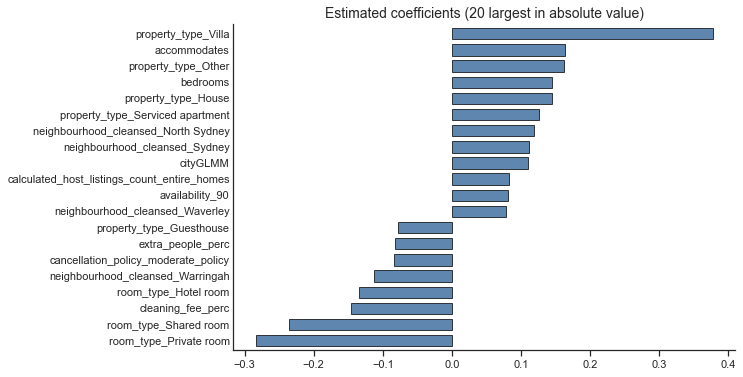

In [185]:
from statlearning import plot_coefficients
plot_coefficients(ols_model, X_train.columns)
plt.savefig("OLS.png")
plt.show()

In [295]:
# coefficient ranking
ols_coef = pd.DataFrame(np.c_[X_train.columns,ols_model.coef_],columns=['features','coef'])
ols_coef.sort_values(by = 'coef',ascending = False).head(10).round(3)

features  coef
58                          property_type_Villa 0.377
15                                 accommodates 0.164
55                          property_type_Other 0.162
17                                     bedrooms 0.146
53                          property_type_House 0.145
56             property_type_Serviced apartment 0.126
40          neighbourhood_cleansed_North Sydney 0.119
44                neighbourhood_cleansed_Sydney 0.112
13                                     cityGLMM 0.110
12  calculated_host_listings_count_entire_homes 0.082

In [296]:
# coefficient ranking
ols_coef.sort_values(by = 'coef',ascending = False).tail(10).round(3)

features   coef
42     neighbourhood_cleansed_Pittwater -0.069
31    host_response_time_within an hour -0.073
52             property_type_Guesthouse -0.077
1                     extra_people_perc -0.082
33  cancellation_policy_moderate_policy -0.083
45     neighbourhood_cleansed_Warringah -0.113
35                 room_type_Hotel room -0.134
0                     cleaning_fee_perc -0.146
37                room_type_Shared room -0.236
36               room_type_Private room -0.284

In [188]:
# prediction
y_pred_ols = ols_model.predict(X_test.to_numpy())
submission_ols = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_ols)], columns=['Id','price'])
submission_ols['Id'] = submission_ols['Id'].astype(int)
submission_ols.to_csv('submission_ols.csv',index=False)

## 6.3 Ridge Regression

In [189]:
from sklearn.linear_model import RidgeCV

In [190]:
%%time
# model fitting
alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)

Wall time: 575 ms


RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       8.91443777e+02, 1.02400000e+03, 1.17626712e+03, 1.35117610e+03,
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]))

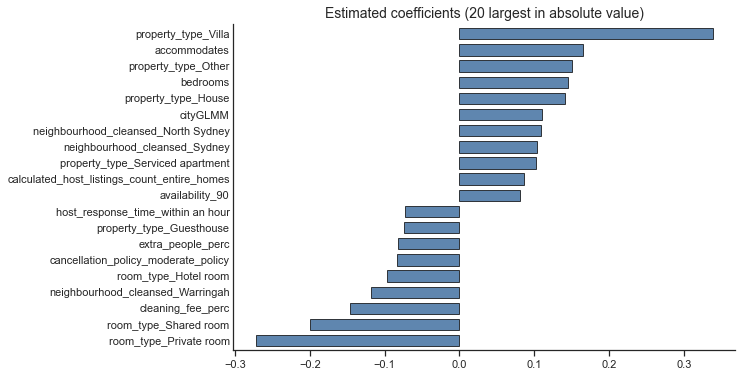

In [191]:
plot_coefficients(ridge, X_train.columns)
plt.savefig("Ridge Regression.png")
plt.show()

In [297]:
# Coefficient ranking
ridge_coef = pd.DataFrame(np.c_[X_train.columns,ridge.coef_],columns=['features','coef'])
ridge_coef.sort_values(by ='coef', ascending = False).round(3)

features   coef
58                           property_type_Villa  0.339
15                                  accommodates  0.165
55                           property_type_Other  0.150
17                                      bedrooms  0.145
53                           property_type_House  0.142
13                                      cityGLMM  0.110
40           neighbourhood_cleansed_North Sydney  0.109
44                 neighbourhood_cleansed_Sydney  0.104
56              property_type_Serviced apartment  0.103
12   calculated_host_listings_count_entire_homes  0.087
8                                availability_90  0.081
14                                     bathrooms  0.072
5                                      longitude  0.071
46               neighbourhood_cleansed_Waverley  0.070
47              neighbourhood_cleansed_Woollahra  0.052
38                  neighbourhood_cleansed_Manly  0.033
54                            property_type_Loft  0.033
41                  neighbourhood_cleansed_Other  0.030
7                         maximum_minimum_nights  0.029
11                        host_neighbourhoodGLMM  0.027
39           neighbourhood_cleansed_Marrickville  0.024
4                                      amenities  0.023
18                                          beds  0.023
57                       property_type_Townhouse  0.022
16                               guests_included  0.021
21                                         notes  0.015
43               neighbourhood_cleansed_Randwick  0.015
28         host_response_time_a few days or more  0.013
24                                   house_rules  0.009
25                                   interaction  0.005
6                               availability_365  0.003
2                                          space -0.001
48                           host_is_superhost_t -0.002
9                 calculated_host_listings_count -0.002
22                         neighborhood_overview -0.003
10                             neighbourhoodGLMM -0.004
26                      host_identity_verified_t -0.008
50                     property_type_Condominium -0.011
23                                    host_about -0.012
3                                       latitude -0.015
27                            instant_bookable_t -0.016
20                           host_listings_count -0.018
19  calculated_host_listings_count_private_rooms -0.026
32                           is_location_exact_t -0.028
49                        property_type_Bungalow -0.030
30         host_response_time_within a few hours -0.045
29               host_response_time_within a day -0.048
34           cancellation_policy_flexible_policy -0.054
51                     property_type_Guest suite -0.067
42              neighbourhood_cleansed_Pittwater -0.071
31             host_response_time_within an hour -0.072
52                      property_type_Guesthouse -0.075
1                              extra_people_perc -0.082
33           cancellation_policy_moderate_policy -0.083
35                          room_type_Hotel room -0.096
45              neighbourhood_cleansed_Warringah -0.118
0                              cleaning_fee_perc -0.146
37                         room_type_Shared room -0.200
36                        room_type_Private room -0.272

In [193]:
# prediction
y_pred_ridge = ridge.predict(X_test.to_numpy())
submission_ridge = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_ridge)], columns=['Id','price'])
submission_ridge['Id'] = submission_ridge['Id'].astype(int)
submission_ridge.to_csv('submission_ridge.csv',index=False)

## 6.4 Lasso Regression

In [194]:
from sklearn.linear_model import LassoCV

# model fitting
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

LassoCV(cv=5)

In [195]:
# EDA
len(X_train.columns)

59

In [196]:
# EDA
np.sum(lasso.coef_==0.0)

12

In [197]:
# EDA
len(X_train.columns)-np.sum(lasso.coef_==0.0)

47

In [298]:
# coefficient ranking
lasso_coef = pd.DataFrame(np.c_[X_train.columns,lasso.coef_],columns=['features','coef'])
lasso_coef.sort_values(by = 'coef', ascending = False).round(3)

features   coef
58                           property_type_Villa  0.298
15                                  accommodates  0.168
17                                      bedrooms  0.145
53                           property_type_House  0.133
55                           property_type_Other  0.111
13                                      cityGLMM  0.107
12   calculated_host_listings_count_entire_homes  0.092
8                                availability_90  0.081
44                 neighbourhood_cleansed_Sydney  0.074
14                                     bathrooms  0.072
40           neighbourhood_cleansed_North Sydney  0.070
5                                      longitude  0.069
46               neighbourhood_cleansed_Waverley  0.037
7                         maximum_minimum_nights  0.030
11                        host_neighbourhoodGLMM  0.026
18                                          beds  0.023
4                                      amenities  0.022
16                               guests_included  0.020
21                                         notes  0.013
47              neighbourhood_cleansed_Woollahra  0.013
24                                   house_rules  0.007
57                       property_type_Townhouse  0.006
56              property_type_Serviced apartment  0.004
25                                   interaction  0.002
50                     property_type_Condominium -0.000
35                          room_type_Hotel room -0.000
10                             neighbourhoodGLMM  0.000
54                            property_type_Loft  0.000
6                               availability_365  0.000
41                  neighbourhood_cleansed_Other  0.000
38                  neighbourhood_cleansed_Manly  0.000
28         host_response_time_a few days or more  0.000
49                        property_type_Bungalow -0.000
39           neighbourhood_cleansed_Marrickville -0.000
22                         neighborhood_overview -0.000
48                           host_is_superhost_t -0.000
2                                          space -0.000
26                      host_identity_verified_t -0.005
9                 calculated_host_listings_count -0.005
23                                    host_about -0.009
3                                       latitude -0.010
43               neighbourhood_cleansed_Randwick -0.011
27                            instant_bookable_t -0.014
20                           host_listings_count -0.017
32                           is_location_exact_t -0.025
19  calculated_host_listings_count_private_rooms -0.026
30         host_response_time_within a few hours -0.033
29               host_response_time_within a day -0.034
52                      property_type_Guesthouse -0.048
51                     property_type_Guest suite -0.049
34           cancellation_policy_flexible_policy -0.050
31             host_response_time_within an hour -0.065
42              neighbourhood_cleansed_Pittwater -0.068
33           cancellation_policy_moderate_policy -0.080
1                              extra_people_perc -0.082
37                         room_type_Shared room -0.123
45              neighbourhood_cleansed_Warringah -0.129
0                              cleaning_fee_perc -0.146
36                        room_type_Private room -0.256

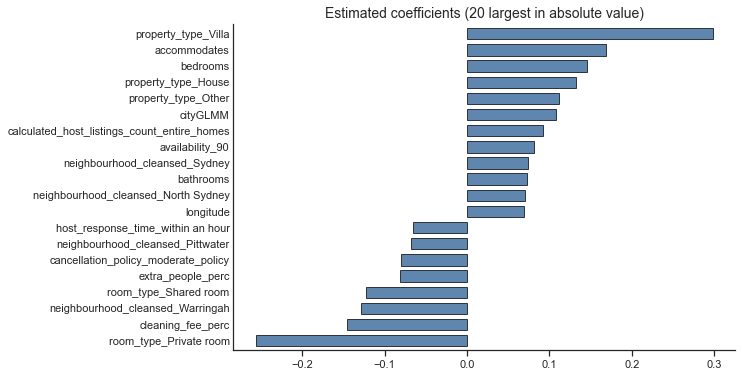

In [199]:
plot_coefficients(lasso,X_train.columns)
plt.savefig("Lasso Regression.png")
plt.show()

In [200]:
# prediction
y_pred_lasso = lasso.predict(X_test.to_numpy())
submission_lasso = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_lasso)], columns=['Id','price'])
submission_lasso['Id'] = submission_lasso['Id'].astype(int)
submission_lasso.to_csv('submission_lasso.csv',index=False)

## 6.5 Elastic net

In [201]:
from sklearn.linear_model import ElasticNetCV
# model fitting
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],cv=5)
enet.fit(X_train, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [202]:
enet.l1_ratio_

0.99

In [203]:
len(X_train.columns)-np.sum(enet.coef_==0.0)

47

<Figure size 1440x1440 with 0 Axes>

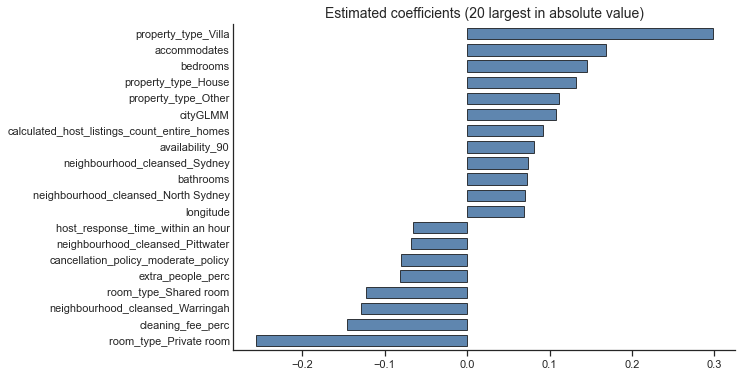

In [469]:
# Coefficient ranking
plt.figure(figsize = (20,20))
plot_coefficients(enet,X_train.columns)
plt.savefig("Elastic net.jpg")
plt.show()

In [299]:
# coeffcient ranking
enet_coef = pd.DataFrame(np.c_[X_train.columns,enet.coef_],columns=['features','coef'])
enet_coef.sort_values( by = 'coef',ascending=False).round(3)

features   coef
58                           property_type_Villa  0.298
15                                  accommodates  0.168
17                                      bedrooms  0.145
53                           property_type_House  0.133
55                           property_type_Other  0.111
13                                      cityGLMM  0.107
12   calculated_host_listings_count_entire_homes  0.092
8                                availability_90  0.081
44                 neighbourhood_cleansed_Sydney  0.074
14                                     bathrooms  0.072
40           neighbourhood_cleansed_North Sydney  0.070
5                                      longitude  0.069
46               neighbourhood_cleansed_Waverley  0.037
7                         maximum_minimum_nights  0.030
11                        host_neighbourhoodGLMM  0.026
18                                          beds  0.023
4                                      amenities  0.022
16                               guests_included  0.020
21                                         notes  0.013
47              neighbourhood_cleansed_Woollahra  0.013
24                                   house_rules  0.007
57                       property_type_Townhouse  0.006
56              property_type_Serviced apartment  0.004
25                                   interaction  0.002
50                     property_type_Condominium -0.000
35                          room_type_Hotel room -0.000
10                             neighbourhoodGLMM  0.000
54                            property_type_Loft  0.000
6                               availability_365  0.000
41                  neighbourhood_cleansed_Other  0.000
38                  neighbourhood_cleansed_Manly  0.000
28         host_response_time_a few days or more  0.000
49                        property_type_Bungalow -0.000
39           neighbourhood_cleansed_Marrickville -0.000
22                         neighborhood_overview -0.000
48                           host_is_superhost_t -0.000
2                                          space -0.000
26                      host_identity_verified_t -0.005
9                 calculated_host_listings_count -0.005
23                                    host_about -0.009
3                                       latitude -0.010
43               neighbourhood_cleansed_Randwick -0.011
27                            instant_bookable_t -0.014
20                           host_listings_count -0.017
32                           is_location_exact_t -0.025
19  calculated_host_listings_count_private_rooms -0.026
30         host_response_time_within a few hours -0.033
29               host_response_time_within a day -0.034
52                      property_type_Guesthouse -0.048
51                     property_type_Guest suite -0.049
34           cancellation_policy_flexible_policy -0.050
31             host_response_time_within an hour -0.065
42              neighbourhood_cleansed_Pittwater -0.068
33           cancellation_policy_moderate_policy -0.080
1                              extra_people_perc -0.082
37                         room_type_Shared room -0.123
45              neighbourhood_cleansed_Warringah -0.129
0                              cleaning_fee_perc -0.146
36                        room_type_Private room -0.256

In [206]:
# prediction
y_pred_enet = enet.predict(X_test.to_numpy())
submission_enet = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_enet)], columns=['Id','price'])
submission_enet['Id'] = submission_enet['Id'].astype(int)
submission_enet.to_csv('submission_enet.csv',index=False)

## 6.6 Decision Tree

In [207]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [208]:
%%time
dt_model = DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf':[1,5,10,20],
    'max_depth':np.arange(1,30),
}

tree = RandomizedSearchCV(dt_model, tuning_parameters,
                         n_iter=20,cv=5,return_train_score=False)
tree.fit(X_train, y_train)

print('Best parameters:',tree.best_params_)

Best parameters: {'min_samples_leaf': 20, 'max_depth': 9}
Wall time: 7.93 s


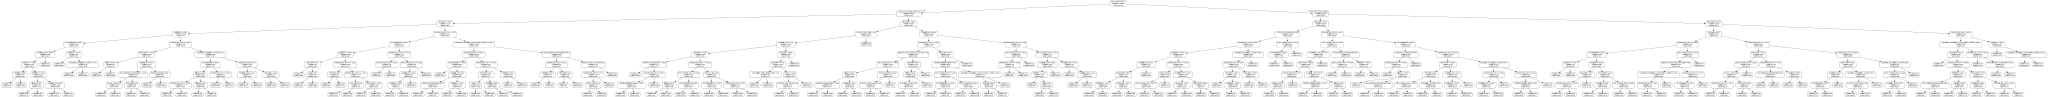

In [209]:
import graphviz
from sklearn.tree import export_graphviz

tree = tree.best_estimator_

dot_data = export_graphviz(tree,out_file=None, feature_names=X_train.columns, impurity=False,
                          class_names=['not aquired','aquired'],rounded=True)
graph = graphviz.Source(dot_data)
graph.render('tree01')
graph

## 6.7 Bagging

In [210]:
from sklearn.ensemble import BaggingRegressor

In [211]:
# model fitting
bag_model = BaggingRegressor(n_estimators=1000,random_state=1)
bag_model.fit(X_train, y_train)

BaggingRegressor(n_estimators=1000, random_state=1)

In [212]:
# prediction
y_pred_bag_model = bag_model.predict(X_test.to_numpy())
submission_bag_model = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_bag_model)], columns=['Id','price'])
submission_bag_model['Id'] = submission_bag_model['Id'].astype(int)
submission_bag_model.to_csv('submission_bag_model.csv',index=False)

## 6.8 Random Foreast

In [213]:
from sklearn.ensemble import RandomForestRegressor

In [214]:
%%time
rf_model = RandomForestRegressor()

tuning_parameters = {
    'n_estimators':[250, 500, 750, 1000, 1500],
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features':np.arange(1, X_train.shape[1]),
}

rf_search = RandomizedSearchCV(rf_model, tuning_parameters,
                              cv=5, n_iter=16,
                              return_train_score=False, n_jobs=-1,
                              random_state = 20)
rf_search.fit(X_train, y_train)
rf = rf_search.best_estimator_
print('Best parameters found by randomised search', rf_search.best_params_, '\n')

Best parameters found by randomised search {'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 18} 

Wall time: 7min 50s


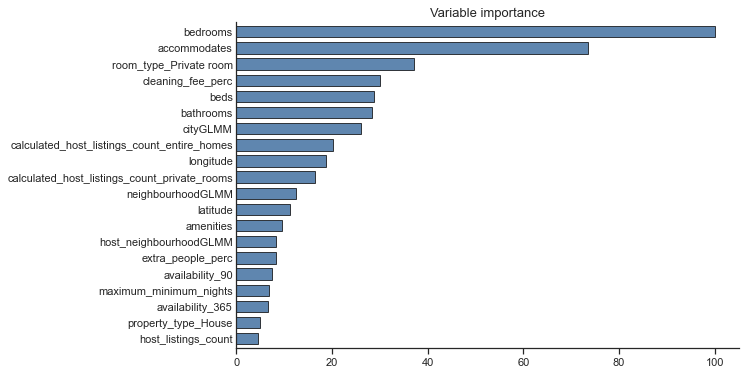

In [215]:
from statlearning import plot_feature_importance
plot_feature_importance(rf, labels=X_train.columns)
plt.savefig("Random foreast.png")
plt.show()

In [216]:
y_pred_rf_search = rf_search.predict(X_test.to_numpy())
submission_rf_search = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_rf_search)], columns=['Id','price'])
submission_rf_search['Id'] = submission_rf_search['Id'].astype(int)
submission_rf_search.to_csv('submission_rf_search.csv',index=False)

## 6.9 Gradient Boosting

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

In [218]:
%%time
# model fitting
gb_model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [250, 500, 750, 1000, 1500],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0]
}

gb_search = RandomizedSearchCV(gb_model, tuning_parameters, n_iter=20, cv=5,
                              return_train_score=False,n_jobs=-1)
gb_search.fit(X_train, y_train)


Wall time: 6min 25s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [250, 500, 750, 1000,
                                                         1500],
                                        'subsample': [0.6, 0.8, 1.0]})

In [219]:
# prediction
y_pred_gb_search = gb_search.predict(X_test.to_numpy())
submission_gb_search = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_gb_search)], columns=['Id','price'])
submission_gb_search['Id'] = submission_gb_search['Id'].astype(int)
submission_gb_search.to_csv('submission_gb_search.csv',index=False)

In [220]:
print('best parameters found', gb_search.best_params_,'\n')

best parameters found {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05} 



In [221]:
gb = gb_search.best_estimator_

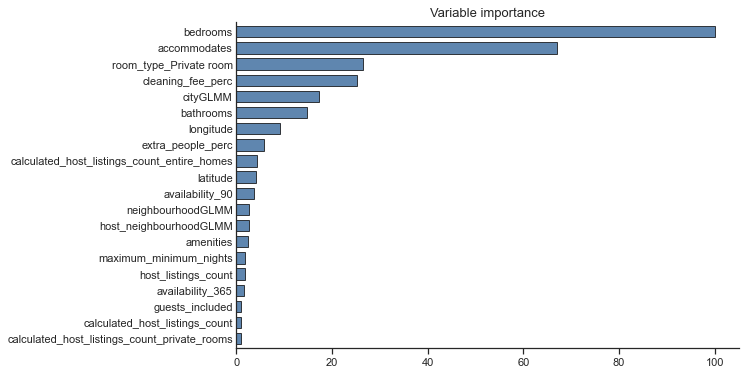

In [222]:
from statlearning import plot_feature_importance

plot_feature_importance(gb, X_train.columns)
plt.savefig("Gradient Boosting.png")
plt.show()

## 6.10 Xgboost


In [223]:
import xgboost as xgb

In [224]:
model = xgb.XGBRegressor(objective='reg:squarederror',reg_lambda=0.5)
# model fitting
tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [250, 500, 750, 1000, 1500, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'subsampling': [0.6, 0.8, 1.0]
}

xbst = RandomizedSearchCV(model, tuning_parameters,
                          cv=5, n_iter=32,n_jobs=-1, 
                          random_state = 87)
xbst.fit(X_train, y_train)
print('Best parameters found by randomised search', xbst.best_params_,'\n')

[19:16:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters found by randomised search {'subsampling': 0.6, 'n_estimators': 750, 'max_depth': 4, 'learning_rate': 0.05} 



In [225]:
xbst = xbst.best_estimator_

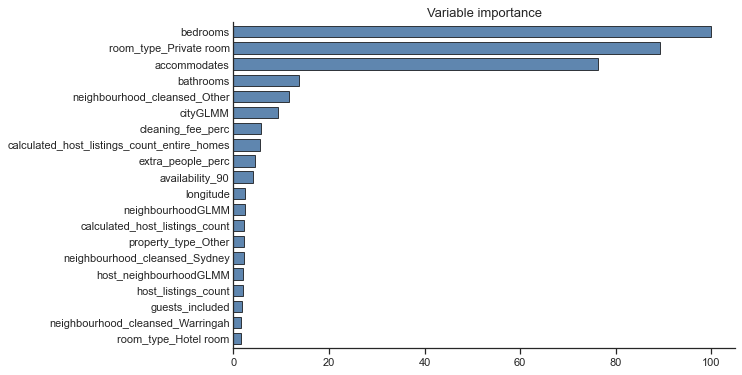

In [226]:
plot_feature_importance(xbst, labels=X_train.columns)
plt.savefig("Xgboost")
plt.show()

In [227]:
# prediction
y_pred_xbst = xbst.predict(X_test)
submission_xbst = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_xbst)], columns=['Id','price'])
submission_xbst['Id'] = submission_xbst['Id'].astype(int)
submission_xbst.to_csv('submission_xbst.csv',index=False)

## 6.11 LightGBM

In [228]:
import lightgbm as lgb

In [229]:
%%time

model = lgb.LGBMRegressor(objective='regression')

tuning_parameters = {
    'learning_rate': [0.01, 0.005, 0.1],
    'n_estimators': [250, 500, 750, 1000, 1500, 2000],
    'num_leaves': list(np.arange(2,64)),
    'subsample': [0.6, 0.8, 1.0],
}

lbst = RandomizedSearchCV(model, tuning_parameters,
                          cv=5, n_iter=32,n_jobs=-1, 
                          random_state = 87)
lbst.fit(X_train, y_train)

print('Best parameters found by randomised search', lbst.best_params_,'\n')

Best parameters found by randomised search {'subsample': 0.8, 'num_leaves': 35, 'n_estimators': 2000, 'learning_rate': 0.01} 

Wall time: 1min 28s


In [230]:
lbst = lbst.best_estimator_

In [231]:
# prediction
y_pred_lbst = lbst.predict(X_test)
submission_lbst = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred_lbst)], columns=['Id','price'])
submission_lbst['Id'] = submission_lbst['Id'].astype(int)
submission_lbst.to_csv('submission_lbst.csv',index=False)

## 6.12 Model Stacking

In [232]:
from mlxtend.regressor import StackingCVRegressor

In [233]:
%%time

# model fitting
models = [ols_model,lasso,ridge,rf,gb,xbst,lbst]
stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=5)
stack.fit(X_train, y_train)
# note: our group has tried to handle with the warning.

[19:21:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in langu

StackingCVRegressor(meta_regressor=LinearRegression(),
                    regressors=[LinearRegression(), LassoCV(cv=5),
                                RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44...
                                             min_child_weight=1, missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=750, n_jobs=0,
                                             num_parallel_tree=1,
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=0.5, scale_pos_weight=1,
                                             subsample=1, subsampling=0.6,
                                    

In [234]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
# model fitting
models = ['ols_model','lasso','enet', 'ridge','rf','gb','xbst','lbst','stack']
scores = []
for i in models:
    if i in ['ols_model','lasso','enet','ridge']:
        predicted = cross_val_predict(eval(i),X_train, y_train, cv=5)
        score = np.sqrt(mean_squared_error(y_train, predicted))
        scores.append(score)
    else:
        predicted = cross_val_predict(eval(i),X_train.to_numpy(), y_train, cv=5)
        score = np.sqrt(mean_squared_error(y_train, predicted))
        scores.append(score)
        
scores_df = pd.DataFrame(scores, index = models,columns = ['RMSE'])
# reference: https://www.w3schools.com/python/ref_func_eval.asp         

[19:27:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:41:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:44:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:44:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in langu

In [243]:
scores_df.round(3)

RMSE
ols_model 0.397
lasso     0.397
enet      0.397
ridge     0.397
rf        0.351
gb        0.334
xbst      0.335
lbst      0.337
stack     0.332

# 7. Submission

In [240]:
X_train.describe().round(3)

cleaning_fee_perc  extra_people_perc     space  latitude  amenities  \
count          10635.000          10635.000 10635.000 10635.000  10635.000   
mean              -0.000              0.000    -0.000     0.000      0.000   
std                1.000              1.000     1.000     1.000      1.000   
min               -2.461             -0.731    -0.497    -6.352     -1.985   
25%               -0.517             -0.731    -0.497    -0.419     -0.807   
50%                0.132             -0.731    -0.497     0.255     -0.173   
75%                0.384              1.278     0.148     0.478      0.643   
max                5.809              1.700    10.460     3.157      7.078   

       longitude  availability_365  maximum_minimum_nights  availability_90  \
count  10635.000         10635.000               10635.000        10635.000   
mean       0.000             0.000                   0.000           -0.000   
std        1.000             1.000                   1.000            1.000   
min       -6.573            -1.059                  -1.391           -0.834   
25%       -0.277            -1.059                  -0.392           -0.834   
50%        0.124             0.177                   0.164           -0.717   
75%        0.679             1.007                   0.782            0.957   
max        1.622             1.308                   2.509            1.808   

       calculated_host_listings_count  neighbourhoodGLMM  \
count                       10635.000          10635.000   
mean                            0.000             -0.000   
std                             1.000              1.000   
min                            -0.741             -3.305   
25%                            -0.741             -0.740   
50%                            -0.741             -0.076   
75%                             0.902              0.674   
max                             1.955              3.416   

       host_neighbourhoodGLMM  calculated_host_listings_count_entire_homes  \
count               10635.000                                    10635.000   
mean                    0.000                                       -0.000   
std                     1.000                                        1.000   
min                    -3.948                                       -1.344   
25%                    -0.165                                       -1.344   
50%                    -0.165                                        0.033   
75%                     0.663                                        0.572   
max                     3.775                                        2.080   

       cityGLMM  bathrooms  accommodates  guests_included  bedrooms      beds  \
count 10635.000  10635.000     10635.000        10635.000 10635.000 10635.000   
mean      0.000      0.000         0.000           -0.000    -0.000    -0.000   
std       1.000      1.000         1.000            1.000     1.000     1.000   
min      -3.423     -8.507        -1.973           -0.627    -2.359    -3.173   
25%      -0.678     -0.581        -0.734           -0.627    -0.513    -0.782   
50%      -0.044     -0.581         0.007           -0.627    -0.513     0.280   
75%       0.669      1.236         0.514            1.351     0.535     0.915   
max       3.246      2.774         2.491            1.868     3.736     3.094   

       calculated_host_listings_count_private_rooms  host_listings_count  \
count                                     10635.000            10635.000   
mean                                         -0.000               -0.000   
std                                           1.000                1.000   
min                                          -0.736               -2.113   
25%                                          -0.736               -0.438   
50%                                          -0.736               -0.438   
75%                                           1.204                0.584   
max       

In [237]:
y_train.round(3)

array([4.304, 4.143, 5.17 , ..., 4.007, 5.707, 5.193])

In [241]:
# prediction
y_pred = stack.predict(X_test.to_numpy())
submission = pd.DataFrame(np.c_[X_test.index,np.exp(y_pred)], columns=['Id','price'])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('submission_stack.csv',index=False)

In [242]:
np.exp(y_pred).round(3)

array([150.569, 487.427, 175.918, ..., 190.322,  77.857,  91.388])